# EDA
## 1. 사기와 아닌 데이터 구분

In [1]:
df = pd.read_csv('./datas/insurance_fraud_detect_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fraud_YN               16000 non-null  int64  
 1   car_model              16000 non-null  int64  
 2   sharing_type           16000 non-null  int64  
 3   age_group              16000 non-null  int64  
 4   has_previous_accident  16000 non-null  int64  
 5   cumulative_use_count   16000 non-null  int64  
 6   b2b                    16000 non-null  int64  
 7   accident_ratio         16000 non-null  int64  
 8   pf_type                16000 non-null  int64  
 9   socarpass              16000 non-null  int64  
 10  socarsave              16000 non-null  int64  
 11  start_hour             16000 non-null  int64  
 12  duration               16000 non-null  int64  
 13  accident_hour          16000 non-null  int64  
 14  repair_cost            16000 non-null  float64
 15  in

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [26]:
from matplotlib import font_manager, rc

f_path = '/Library/Fonts/Arial Unicode.ttf'
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

plt.rcParams['axes.unicode_minus'] = False

In [3]:
df_fr_t = df[df.fraud_YN == 1]
df_fr_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 6 to 11179
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fraud_YN               41 non-null     int64  
 1   car_model              41 non-null     int64  
 2   sharing_type           41 non-null     int64  
 3   age_group              41 non-null     int64  
 4   has_previous_accident  41 non-null     int64  
 5   cumulative_use_count   41 non-null     int64  
 6   b2b                    41 non-null     int64  
 7   accident_ratio         41 non-null     int64  
 8   pf_type                41 non-null     int64  
 9   socarpass              41 non-null     int64  
 10  socarsave              41 non-null     int64  
 11  start_hour             41 non-null     int64  
 12  duration               41 non-null     int64  
 13  accident_hour          41 non-null     int64  
 14  repair_cost            41 non-null     float64
 15  insur

In [4]:
df_fr_f = df[df.fraud_YN == 0]
df_fr_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15959 entries, 0 to 15999
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fraud_YN               15959 non-null  int64  
 1   car_model              15959 non-null  int64  
 2   sharing_type           15959 non-null  int64  
 3   age_group              15959 non-null  int64  
 4   has_previous_accident  15959 non-null  int64  
 5   cumulative_use_count   15959 non-null  int64  
 6   b2b                    15959 non-null  int64  
 7   accident_ratio         15959 non-null  int64  
 8   pf_type                15959 non-null  int64  
 9   socarpass              15959 non-null  int64  
 10  socarsave              15959 non-null  int64  
 11  start_hour             15959 non-null  int64  
 12  duration               15959 non-null  int64  
 13  accident_hour          15959 non-null  int64  
 14  repair_cost            15959 non-null  float64
 15  in

In [2]:
df.fraud_YN[df.repair_cnt.isin([1,2,3])].sum()

41

## 2. Y/N data의 feature간 density 비교

/Users/dockyum/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/dockyum/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.
/Users/dockyum/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


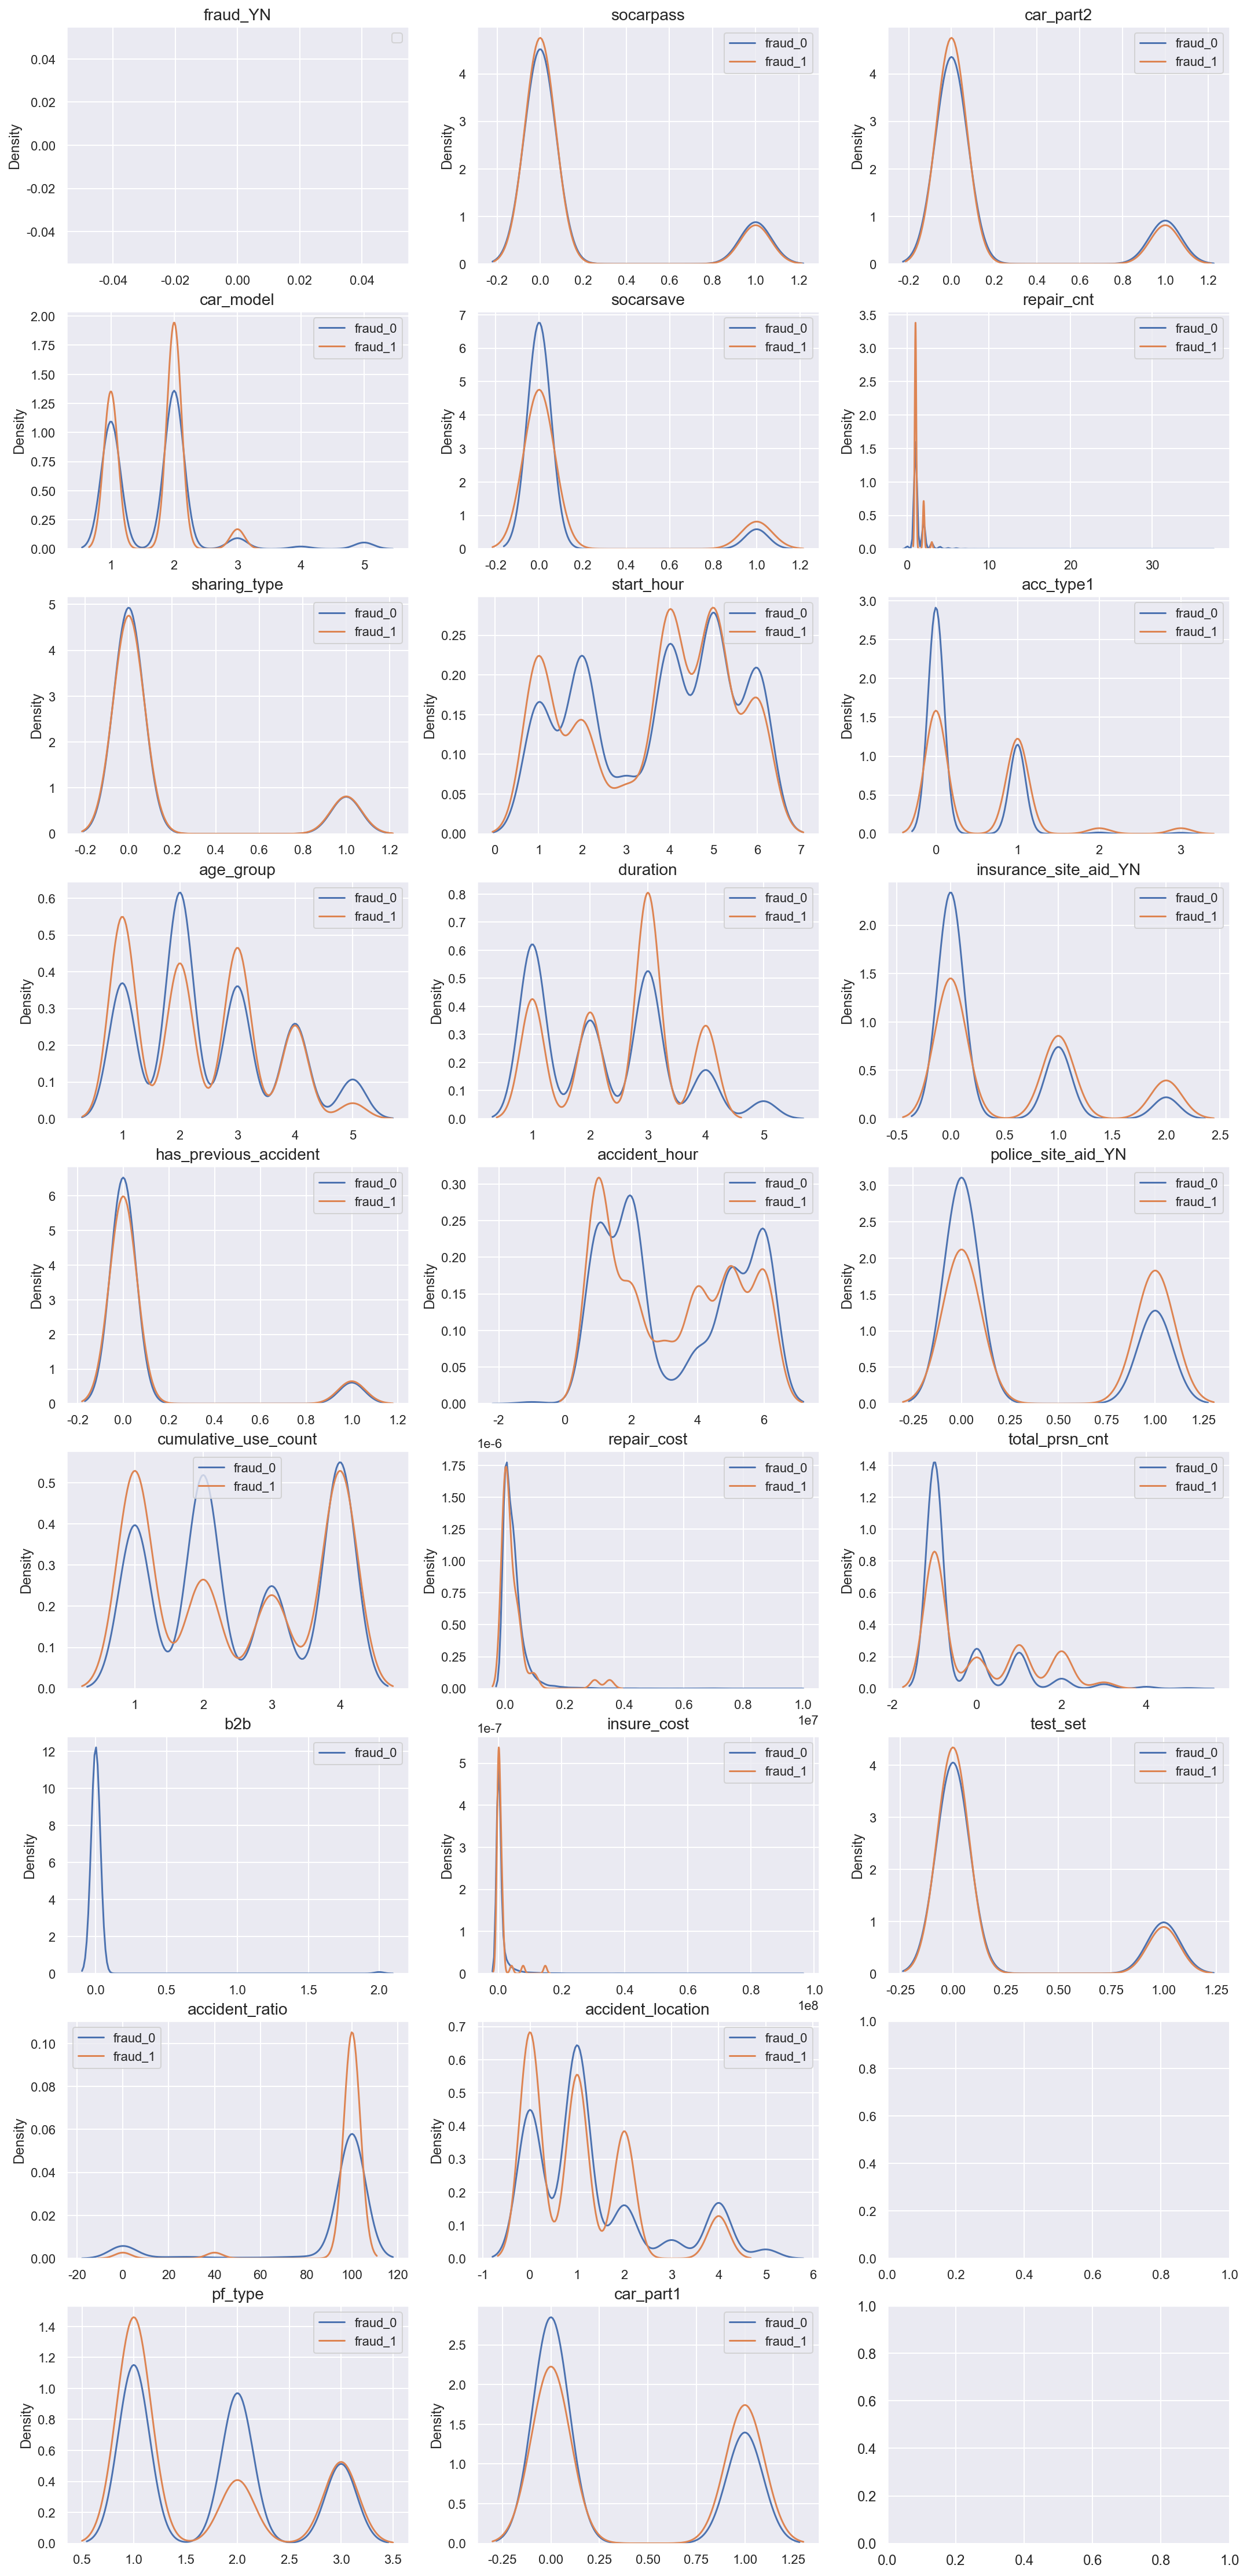

In [283]:
fig, axes = plt.subplots(9, 3, figsize=(18,40))
axes = axes.T.flatten()

for idx, feature in enumerate(df.columns.values):
    sns.kdeplot(df_fr_f[feature], bw_method=0.2, label='fraud_0', ax=axes[idx])
    sns.kdeplot(df_fr_t[feature], bw_method=0.2, label='fraud_1', ax=axes[idx])    
    
    axes[idx].set_title(feature, fontsize=14)
    axes[idx].set_xlabel('')
    axes[idx].legend()

    plt.tick_params(axis='both', which='major', labelsize=12)

눈에띄게 다른 feature
- age_group
- start_hour
- acc_type1
- cumulative_use_count
- duration
- accident_hour
- total_prsn_cnt
- accident_ratio
- accident_location
- pf_type

In [163]:
# 사기는 미신고 없다
df_fr_t['police_site_aid_YN'].unique()

array([1, 0])

## 3. 사기 데이터의 histogram

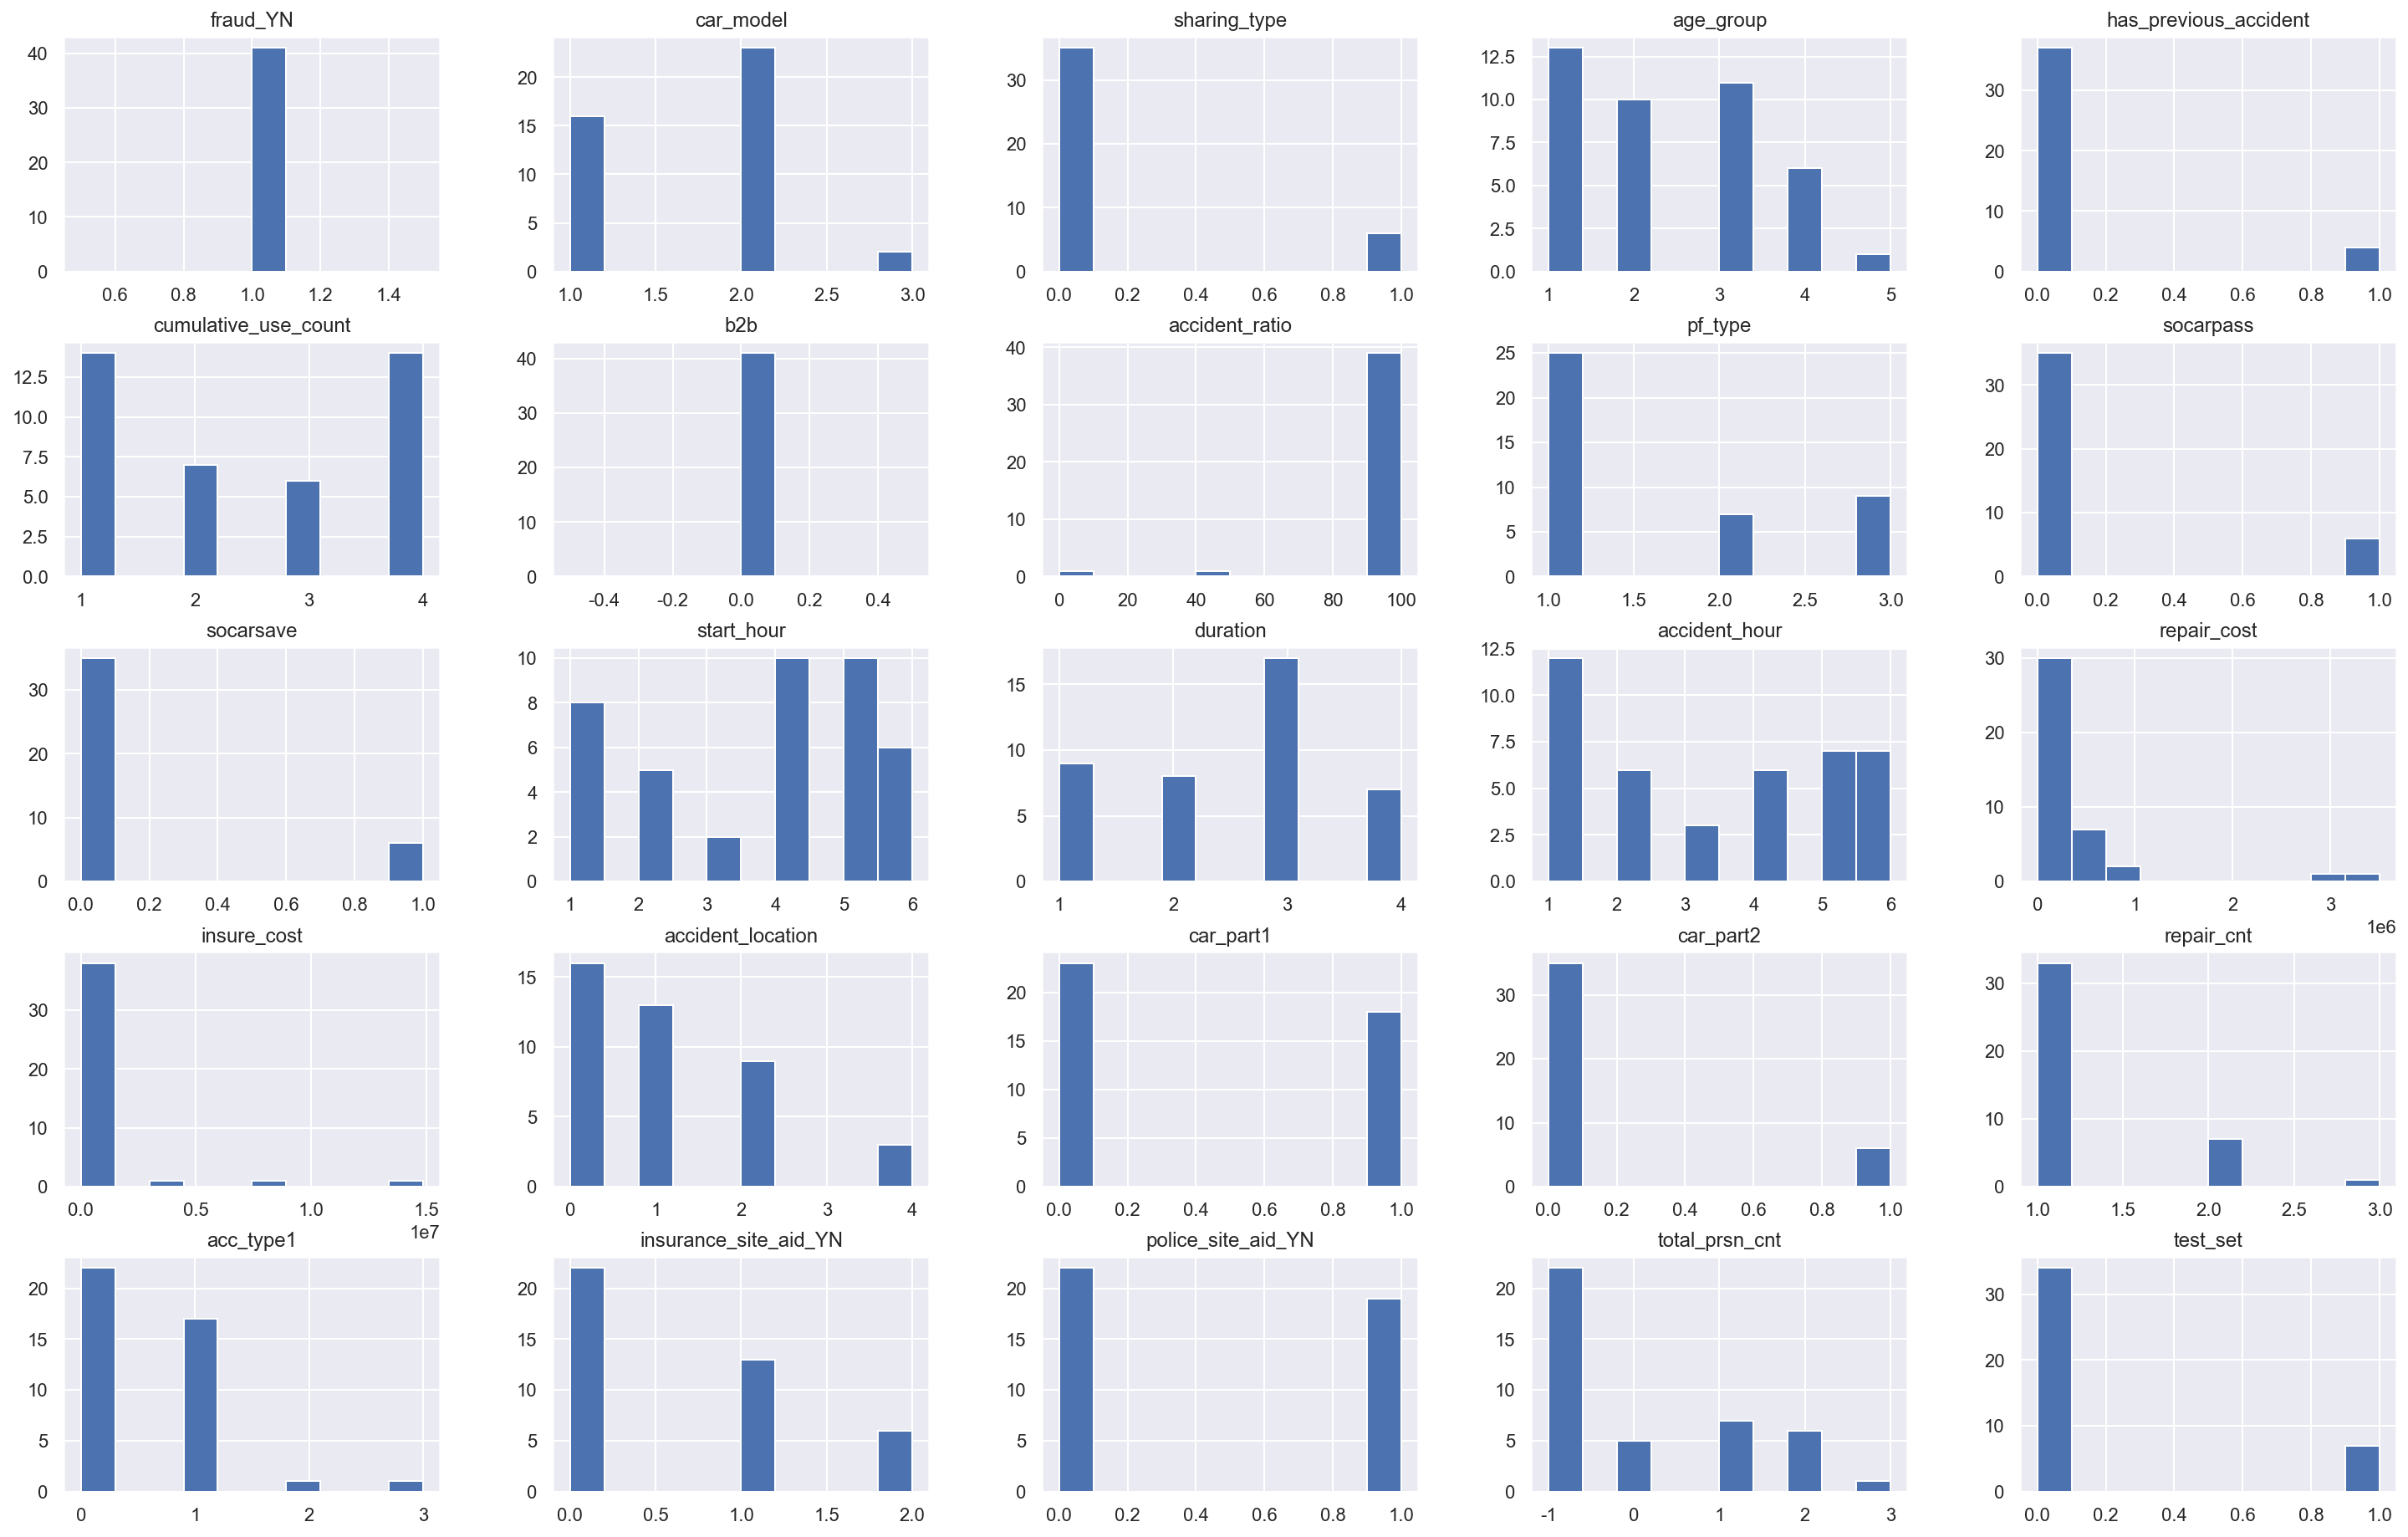

In [314]:
df_fr_t.hist(figsize=(25,16));

In [378]:
type(list(df_fr_t.columns))

list

In [367]:
# 비율 파악

for cols in df_fr_t.columns:
    print(f"[{cols}]")
    for idx, value in df_fr_t[cols].value_counts().iteritems():
        percnt = round(value / 41 * 100, 1)
        print(f"'{idx}' : {value} ({percnt}%)", "/" , end=' ')
    print()    
    print('=========', sep='\n')

[fraud_YN]
'1' : 41 (100.0%) / 
[car_model]
'2' : 23 (56.1%) / '1' : 16 (39.0%) / '3' : 2 (4.9%) / 
[sharing_type]
'0' : 35 (85.4%) / '1' : 6 (14.6%) / 
[age_group]
'1' : 13 (31.7%) / '3' : 11 (26.8%) / '2' : 10 (24.4%) / '4' : 6 (14.6%) / '5' : 1 (2.4%) / 
[has_previous_accident]
'0' : 37 (90.2%) / '1' : 4 (9.8%) / 
[cumulative_use_count]
'4' : 14 (34.1%) / '1' : 14 (34.1%) / '2' : 7 (17.1%) / '3' : 6 (14.6%) / 
[b2b]
'0' : 41 (100.0%) / 
[accident_ratio]
'100' : 39 (95.1%) / '40' : 1 (2.4%) / '0' : 1 (2.4%) / 
[pf_type]
'1' : 25 (61.0%) / '3' : 9 (22.0%) / '2' : 7 (17.1%) / 
[socarpass]
'0' : 35 (85.4%) / '1' : 6 (14.6%) / 
[socarsave]
'0' : 35 (85.4%) / '1' : 6 (14.6%) / 
[start_hour]
'5' : 10 (24.4%) / '4' : 10 (24.4%) / '1' : 8 (19.5%) / '6' : 6 (14.6%) / '2' : 5 (12.2%) / '3' : 2 (4.9%) / 
[duration]
'3' : 17 (41.5%) / '1' : 9 (22.0%) / '2' : 8 (19.5%) / '4' : 7 (17.1%) / 
[accident_hour]
'1' : 12 (29.3%) / '6' : 7 (17.1%) / '5' : 7 (17.1%) / '4' : 6 (14.6%) / '2' : 6 (14.6%) / '

- 차 모델에 수입은 없다
- 나이대는 21, 23, 27 까지 [34건/83%]
- 누적사고 유 [4건]
- 누적대여 10번이상과 1번이 [28건/68%]
- 전부 개인
- 과실율 100% [39건/95%]
- 보험료 타입 자기부담금 낮은것(보험금 높은것) [25건/61%]
- 소카패스, 소카세이브 [6건/15%]
- 시작시간 아침 8시부터 13시까지 [20건/49%]
- 대여기간 36시간 이하 [17건] 나머지(기본대여 세팅 4시간 9건) 고르게 [평균 8건]
- 사고시각 0시-4시, 21시-23시 [12건] 고른편?
- 수리부위 1개 [33건]
- 보험사 현장출동 모른다[22건]
- 신고 미신고 모른다 [22건]
- 탑승인원 미확인 [22건]

In [65]:
pd.options.display.max_columns = None

## 4. 사기 유저의 특이한 대여 패턴이 있을까?
일반적인 소카 유저와 사기 유저는 대여 패턴이 다를거라 생각
### 4-1. 이용시작시간과 대여기간

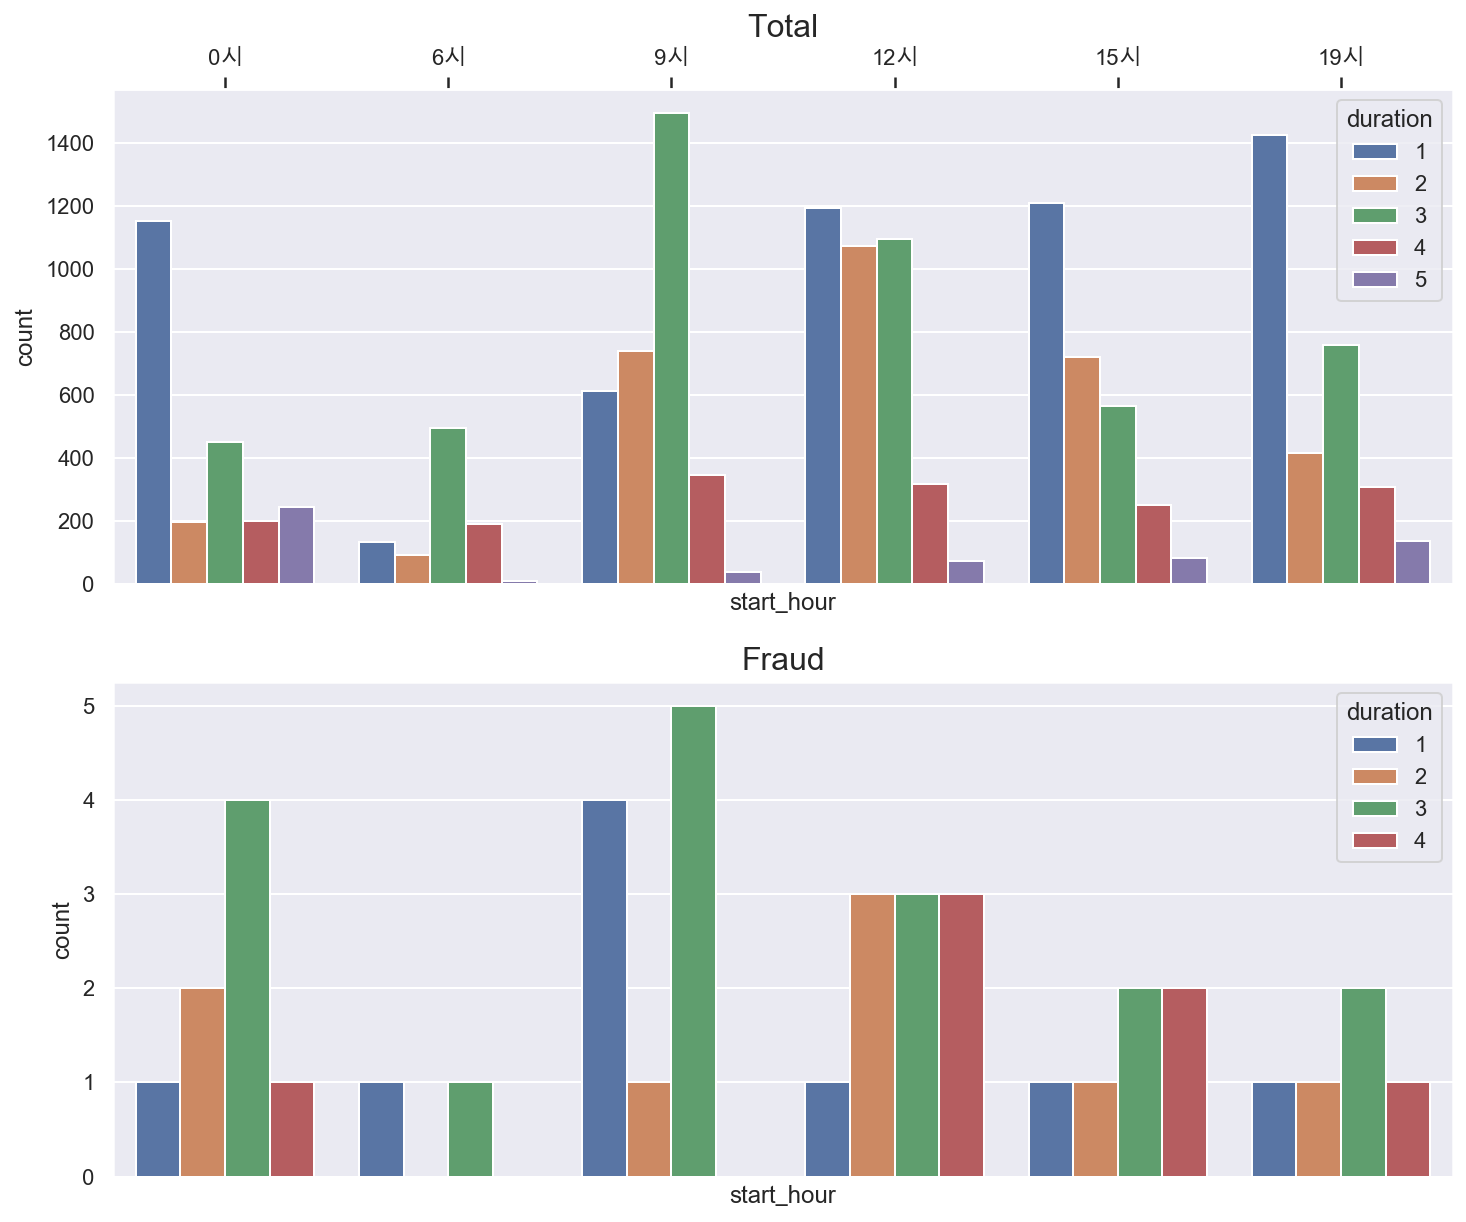

<Figure size 864x576 with 0 Axes>

In [380]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10))
plt.figure(figsize=(12,8))
sns.countplot(x='start_hour',hue='duration' ,data=df, ax=ax[0], order=[1,3,4,5,6,2])
ax[0].set_title('Total', fontsize=16)
ax[0].set_xticks([])
ax_t = ax[0].secondary_xaxis('top')
ax_t.set_xticks(ticks=np.arange(7))
ax_t.set_xticklabels(labels = ['0시','6시','9시','12시','15시','19시','22시'])

sns.countplot(x='start_hour',hue='duration' ,data=df_fr_t, ax=ax[1], order=[1,3,4,5,6,2]);
ax[1].set_title('Fraud', fontsize=16)
ax[1].set_xticks([]);

# 일반적인 소카 유저는 1.아침을 제외하곤 짧게 빌리고 2.아침에는 10시간이상 빌리는 비율이 높다(여행이라 추측)
# 사기 유저는 반면에 1. 밤에 길게 빌리거나 2. 아침에 짧게 빌리는 비율이 높다

# => 아침을 제외하고 전체적으로 길게 빌리는 비율이 높다. => 전략적 선택인가
# => 한계 : 데이터의 수가 적어서 한 두 건 차이로 경향을 단정짓긴 어려움

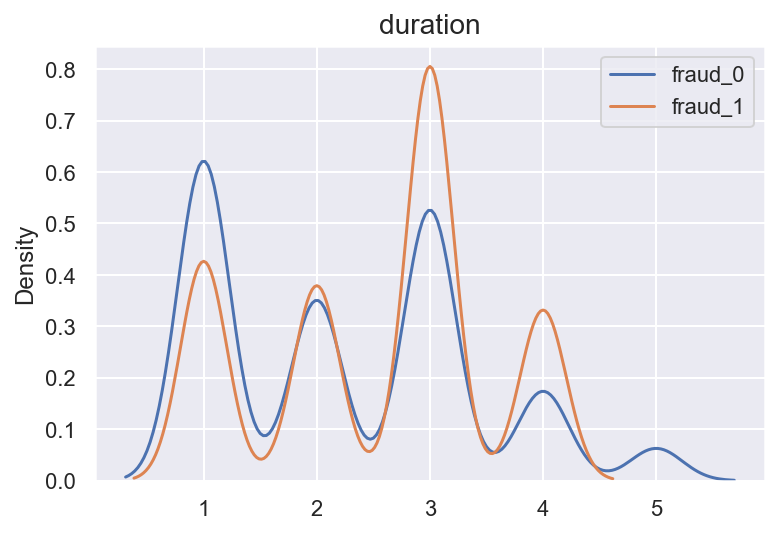

In [364]:
sns.kdeplot(df_fr_f['duration'], bw_method=0.2, label='fraud_0')
sns.kdeplot(df_fr_t['duration'], bw_method=0.2, label='fraud_1')    

plt.title('duration', fontsize=14)
plt.xlabel('')
plt.legend();

# 확실히 대여기간의 분포가 상대적으로 길다

### 이용시작시간, 대여기간, 차량 종류

In [356]:
df_tmp = df.pivot_table(index=['start_hour','duration'], columns='car_model', values='fraud_YN', aggfunc=np.ma.count)
df_tmp = round(df_tmp * 100 / len(df), 2)
df_tmp = df_tmp.fillna(0)
df_tmp = df_tmp.drop(5, level=1)
df_tmp = df_tmp.drop([4,5], axis=1)
df_tmp = df_tmp.rename(index={1:"00시", 2:"19시", 3: "06시", 4: "09시", 5: "12시", 6: "15시"}, level=0).sort_index()
df_tmp

car_model               1     2     3
start_hour duration                  
00시        1        2.980 3.890 0.140
           2        0.500 0.620 0.070
           3        1.120 1.430 0.160
           4        0.410 0.660 0.090
06시        1        0.410 0.370 0.010
           2        0.260 0.280 0.010
           3        1.120 1.600 0.270
           4        0.480 0.490 0.110
09시        1        1.590 2.090 0.110
           2        2.130 2.160 0.180
           3        3.940 4.680 0.440
           4        0.830 1.090 0.120
12시        1        3.250 3.920 0.160
           2        2.970 3.470 0.150
           3        2.870 3.520 0.240
           4        0.710 1.040 0.110
15시        1        3.310 3.970 0.160
           2        1.940 2.330 0.110
           3        1.350 1.820 0.180
           4        0.590 0.860 0.080
19시        1        3.640 4.970 0.140
           2        1.180 1.270 0.060
           3        1.890 2.480 0.220
           4        0.710 1.030 0.090

In [383]:
df_tmp2 = df_fr_t.pivot_table(index=['start_hour','duration'], columns='car_model', values='fraud_YN', aggfunc=np.ma.count)
df_tmp2 = round(df_tmp2 * 100 / len(df_fr_t), 2)
df_tmp2 = df_tmp2.fillna(0)
df_tmp2 = df_tmp2.rename(index={1:"00시", 2:"19시", 3: "06시", 4: "09시", 5: "12시", 6: "15시"}, level=0).sort_index()
df_tmp2

car_model               1     2     3
start_hour duration                  
00시        1        2.440 0.000 0.000
           2        4.880 0.000 0.000
           3        7.320 2.440 0.000
           4        2.440 0.000 0.000
06시        1        0.000 2.440 0.000
           3        2.440 0.000 0.000
09시        1        0.000 9.760 0.000
           2        0.000 2.440 0.000
           3        2.440 9.760 0.000
12시        1        2.440 0.000 0.000
           2        0.000 7.320 0.000
           3        4.880 2.440 0.000
           4        2.440 4.880 0.000
15시        1        2.440 0.000 0.000
           2        0.000 2.440 0.000
           3        2.440 0.000 2.440
           4        0.000 2.440 2.440
19시        1        0.000 2.440 0.000
           2        0.000 2.440 0.000
           3        0.000 4.880 0.000
           4        2.440 0.000 0.000

<Figure size 432x288 with 0 Axes>

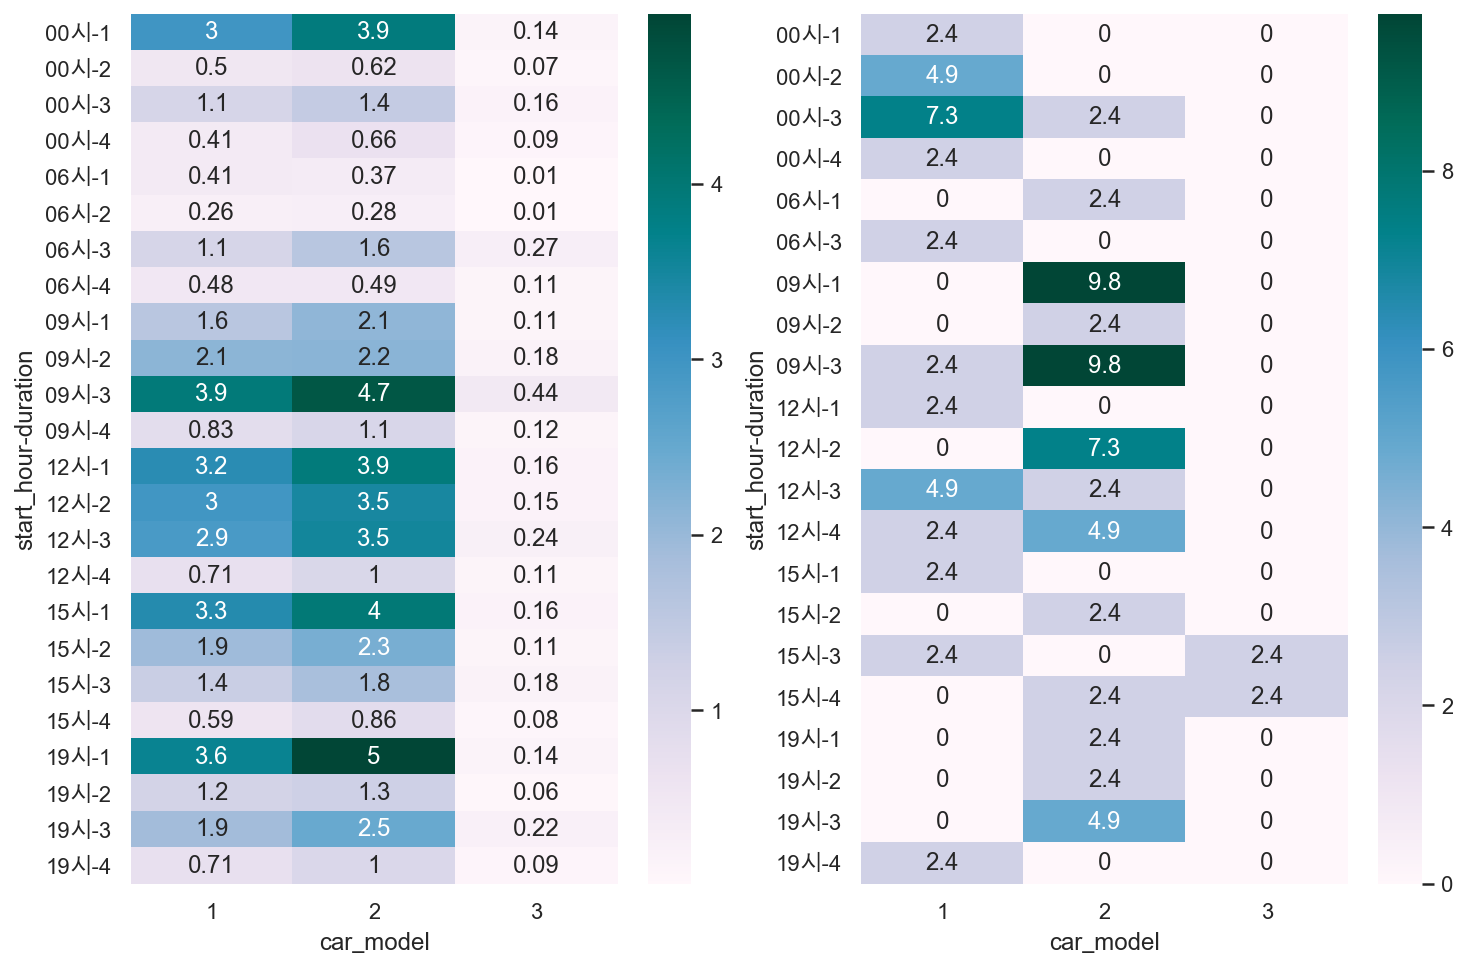

In [398]:
plt.figure(figsize=(6,4))
fig, ax = plt.subplots(1,2, figsize=(12,8))
sns.heatmap(df_tmp, ax=ax[0], cmap="PuBuGn",annot=True)
sns.heatmap(df_tmp2, ax=ax[1], cmap="PuBuGn",annot=True);

# 중형차량의 오전, 낮 대여

### 패턴당 건수 비율의 차이

In [418]:
df_tmp = df.pivot_table(index=['start_hour','duration'], columns='car_model', values='fraud_YN', aggfunc=np.ma.count)
df_tmp = round(df_tmp * 100 / len(df), 2)
df_tmp = df_tmp.fillna(0)
df_tmp = df_tmp.drop(5, level=1)
df_tmp = df_tmp.drop([4,5], axis=1)
df_tmp = df_tmp.rename(index={1:" 0시", 2:"19시", 3: " 6시", 4: " 9시", 5: "12시", 6: "15시"}, level=0).sort_index()
df_tmp = df_tmp.rename(index={1:" 4시간", 2:" 8시간", 3: "36시간", 4: "48시간"}, level=1)

df_tmp2 = df_fr_t.pivot_table(index=['start_hour','duration'], columns='car_model', values='fraud_YN', aggfunc=np.ma.count)
df_tmp2 = round(df_tmp2 * 100 / len(df_fr_t), 2)
df_tmp2 = df_tmp2.fillna(0)
df_tmp2 = df_tmp2.rename(index={1:" 0시", 2:"19시", 3: " 6시", 4: " 9시", 5: "12시", 6: "15시"}, level=0).sort_index()
df_tmp2 = df_tmp2.rename(index={1:" 4시간", 2:" 8시간", 3: "36시간", 4: "48시간"}, level=1)

df_tmp3 = df_tmp2 - df_tmp
df_tmp3 = df_tmp3.fillna(0)
df_tmp3.head()

car_model                1      2      3
start_hour duration                     
 0시         4시간     -0.540 -3.890 -0.140
            8시간      4.380 -0.620 -0.070
           36시간      6.200  1.010 -0.160
           48시간      2.030 -0.660 -0.090
 6시         4시간     -0.410  2.070 -0.010

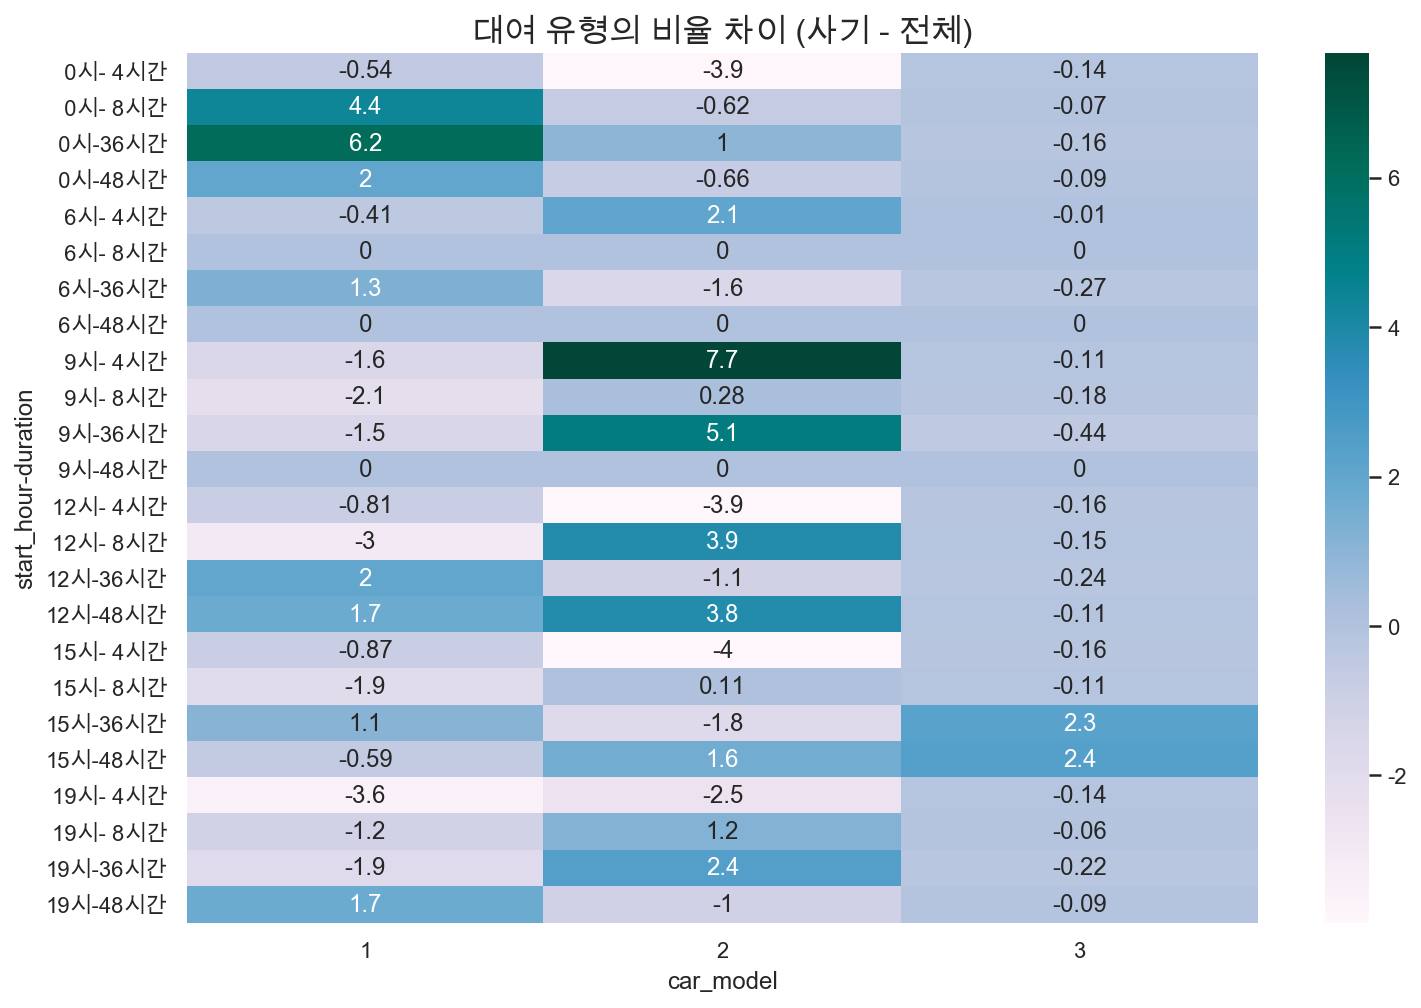

In [433]:
plt.figure(figsize=(12,8))
sns.heatmap(df_tmp3, cmap="PuBuGn", annot=True);
plt.title('대여 유형의 비율 차이 (사기 - 전체)', fontsize=16);

# 중형차량의 오전, 낮 대여

## 5. 일반 사고와 다른 특이한 패턴이 있을까?

In [429]:
df_tmp = df.pivot_table(index=['accident_hour','accident_location'], columns='car_model', values='fraud_YN', aggfunc=np.ma.count)
df_tmp = round(df_tmp * 100 / len(df), 2)
df_tmp = df_tmp.fillna(0)
df_tmp = df_tmp.drop(-1, level=0)
df_tmp = df_tmp.drop([5,3], level=1)
df_tmp = df_tmp.drop([4,5], axis=1)
df_tmp = df_tmp.rename(index={1:" 0시", 2:"19시", 3: " 6시", 4: " 9시", 5: "12시", 6: "15시"}, level=0).sort_index()
df_tmp.head()

car_model                           1     2     3
accident_hour accident_location                  
 0시           0                 2.480 2.880 0.200
              1                 4.230 5.620 0.360
              2                 0.890 1.340 0.110
              4                 1.510 1.940 0.090
 6시           0                 0.230 0.350 0.020

In [431]:
df_tmp2 = df_fr_t.pivot_table(index=['accident_hour','accident_location'], columns='car_model', values='fraud_YN', aggfunc=np.ma.count)
df_tmp2 = round(df_tmp2 * 100 / len(df_fr_t), 2)
df_tmp2 = df_tmp2.fillna(0)
df_tmp2 = df_tmp2.rename(index={1:" 0시", 2:"19시", 3: " 6시", 4: " 9시", 5: "12시", 6: "15시"}, level=0).sort_index()
df_tmp2.head()

car_model                           1     2     3
accident_hour accident_location                  
 0시           0                 7.320 2.440 0.000
              1                 9.760 4.880 0.000
              2                 2.440 0.000 0.000
              4                 0.000 2.440 0.000
 6시           0                 2.440 0.000 0.000

<Figure size 432x288 with 0 Axes>

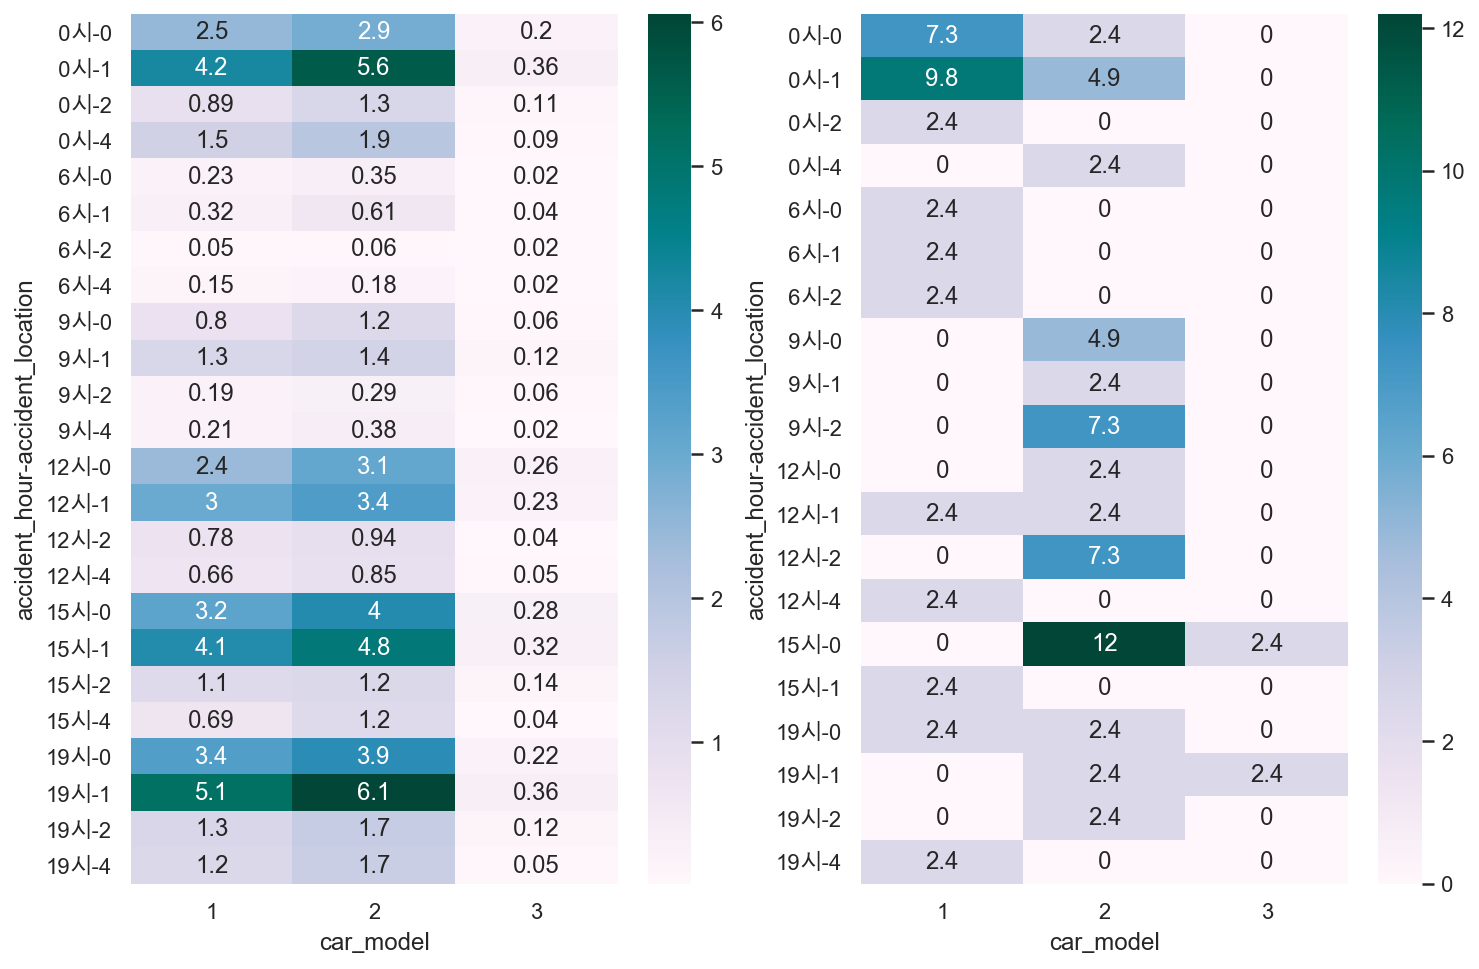

In [432]:
plt.figure(figsize=(6,4))
fig, ax = plt.subplots(1,2, figsize=(12,8))
sns.heatmap(df_tmp, ax=ax[0], cmap="PuBuGn",annot=True)
sns.heatmap(df_tmp2, ax=ax[1], cmap="PuBuGn",annot=True);

# 

In [436]:
df_tmp = df.pivot_table(index=['accident_hour','accident_location'], columns='car_model', values='fraud_YN', aggfunc=np.ma.count)
df_tmp = round(df_tmp * 100 / len(df), 2)
df_tmp = df_tmp.fillna(0)
df_tmp = df_tmp.drop(-1, level=0)
df_tmp = df_tmp.drop([5,3], level=1)
df_tmp = df_tmp.drop([4,5], axis=1)
df_tmp = df_tmp.rename(index={1:" 0시", 2:"19시", 3: " 6시", 4: " 9시", 5: "12시", 6: "15시"}, level=0).sort_index()

df_tmp2 = df_fr_t.pivot_table(index=['accident_hour','accident_location'], columns='car_model', values='fraud_YN', aggfunc=np.ma.count)
df_tmp2 = round(df_tmp2 * 100 / len(df_fr_t), 2)
df_tmp2 = df_tmp2.fillna(0)
df_tmp2 = df_tmp2.rename(index={1:" 0시", 2:"19시", 3: " 6시", 4: " 9시", 5: "12시", 6: "15시"}, level=0).sort_index()

df_tmp3 = df_tmp2 - df_tmp
df_tmp3 = df_tmp3.fillna(0)
df_tmp3 = df_tmp3.rename(index={0:"주차장", 1:"일반도로", 2:"이면도로", 3:"고속도로", 4:"쏘카존"}, level=1)

df_tmp3.head()

car_model                            1      2      3
accident_hour accident_location                     
 0시           주차장                4.840 -0.440 -0.200
              일반도로               5.530 -0.740 -0.360
              이면도로               1.550 -1.340 -0.110
              쏘카존               -1.510  0.500 -0.090
 6시           주차장                2.210 -0.350 -0.020

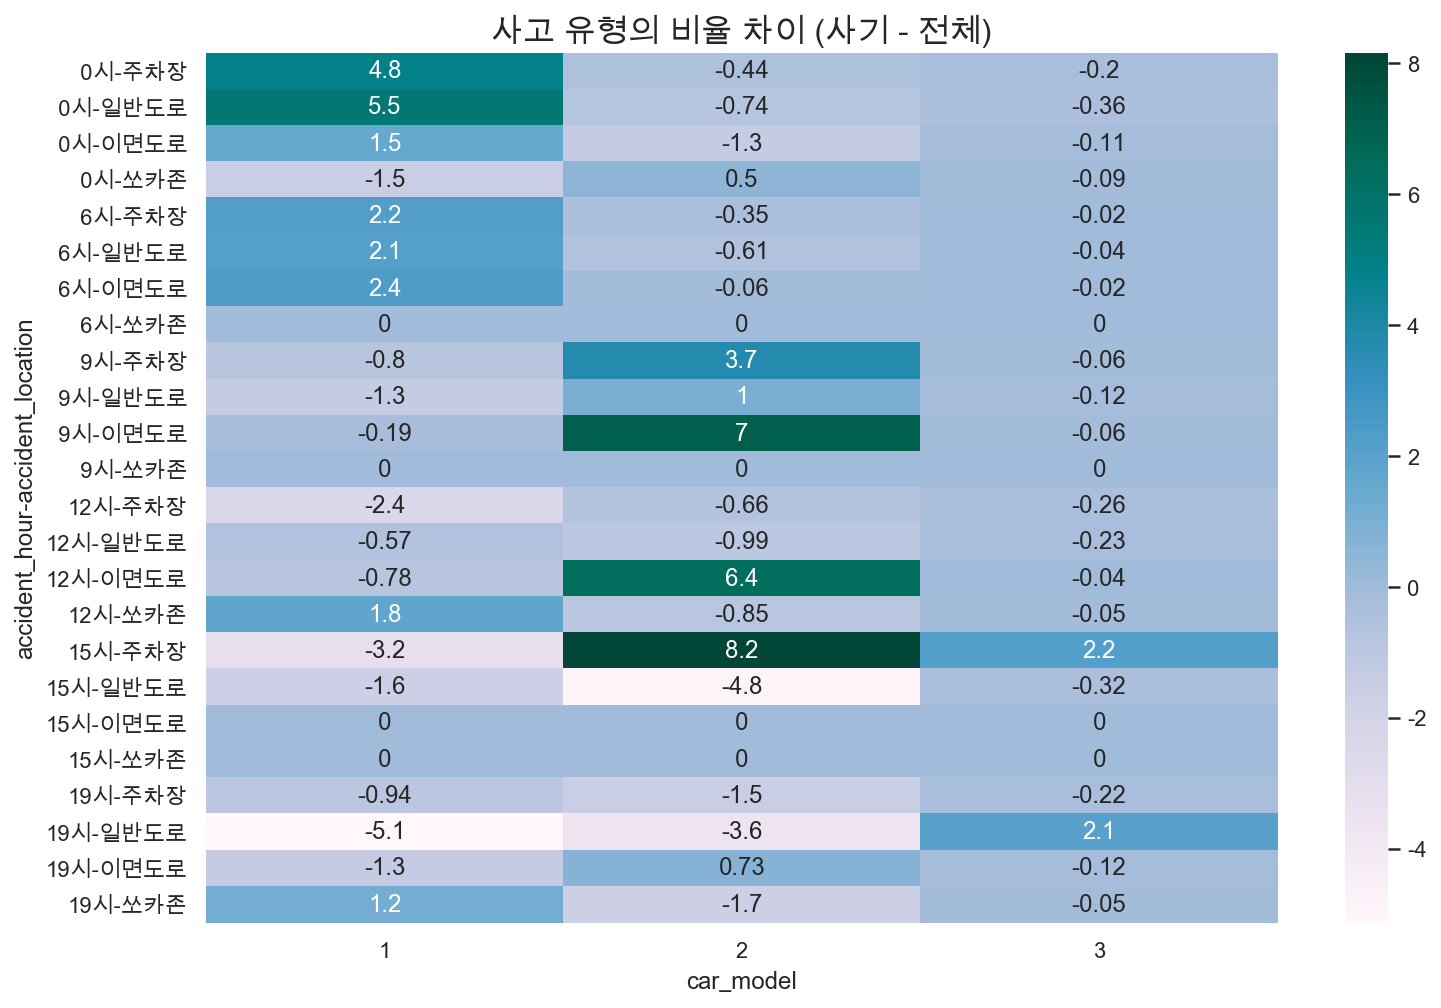

In [437]:
plt.figure(figsize=(12,8))
sns.heatmap(df_tmp3, cmap="PuBuGn", annot=True);
plt.title('사고 유형의 비율 차이 (사기 - 전체)', fontsize=16);

# 중형차량의 오전, 낮 대여

## 

In [ ]:
df.

## duration을 나누어 데이터 분석

## 

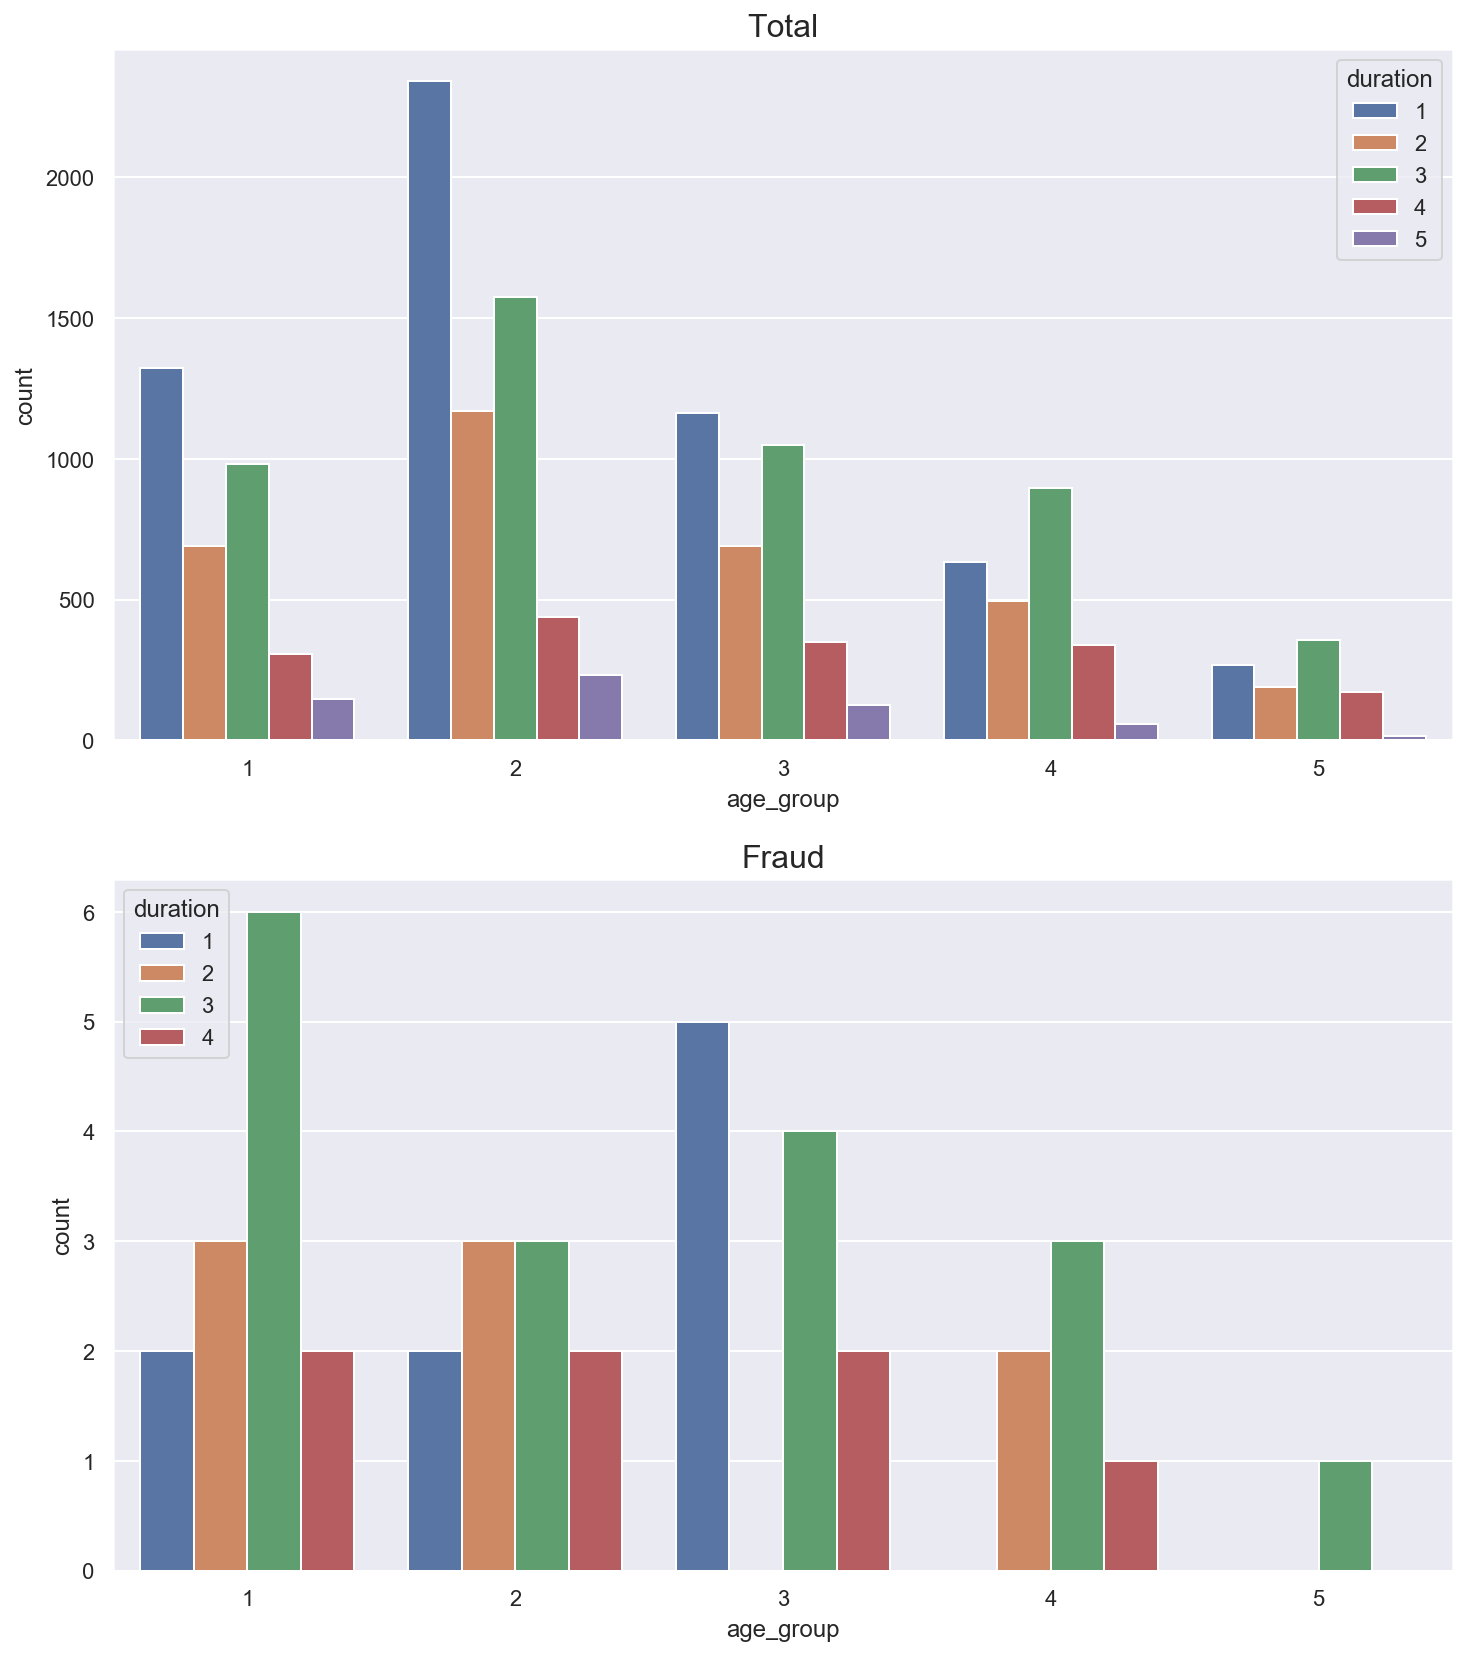

<Figure size 864x576 with 0 Axes>

In [41]:
# 나이와 대여기간
fig, ax = plt.subplots(2, 1, figsize=(12, 14))
plt.figure(figsize=(12,8))
sns.countplot(x='age_group',hue='duration' ,data=df, ax=ax[0])
ax[0].set_title('Total', fontsize=16)
sns.countplot(x='age_group',hue='duration' ,data=df_fr_t, ax=ax[1]);
ax[1].set_title('Fraud', fontsize=16);

# 전체적으로는 나이와 상관없이 짧은대여, 10~15시간 대여, 6~9시간 대여 순인데반해
# Fraud는 어린 나이에서의 10~15시간 대여 비율이 도드라져보임
# => 

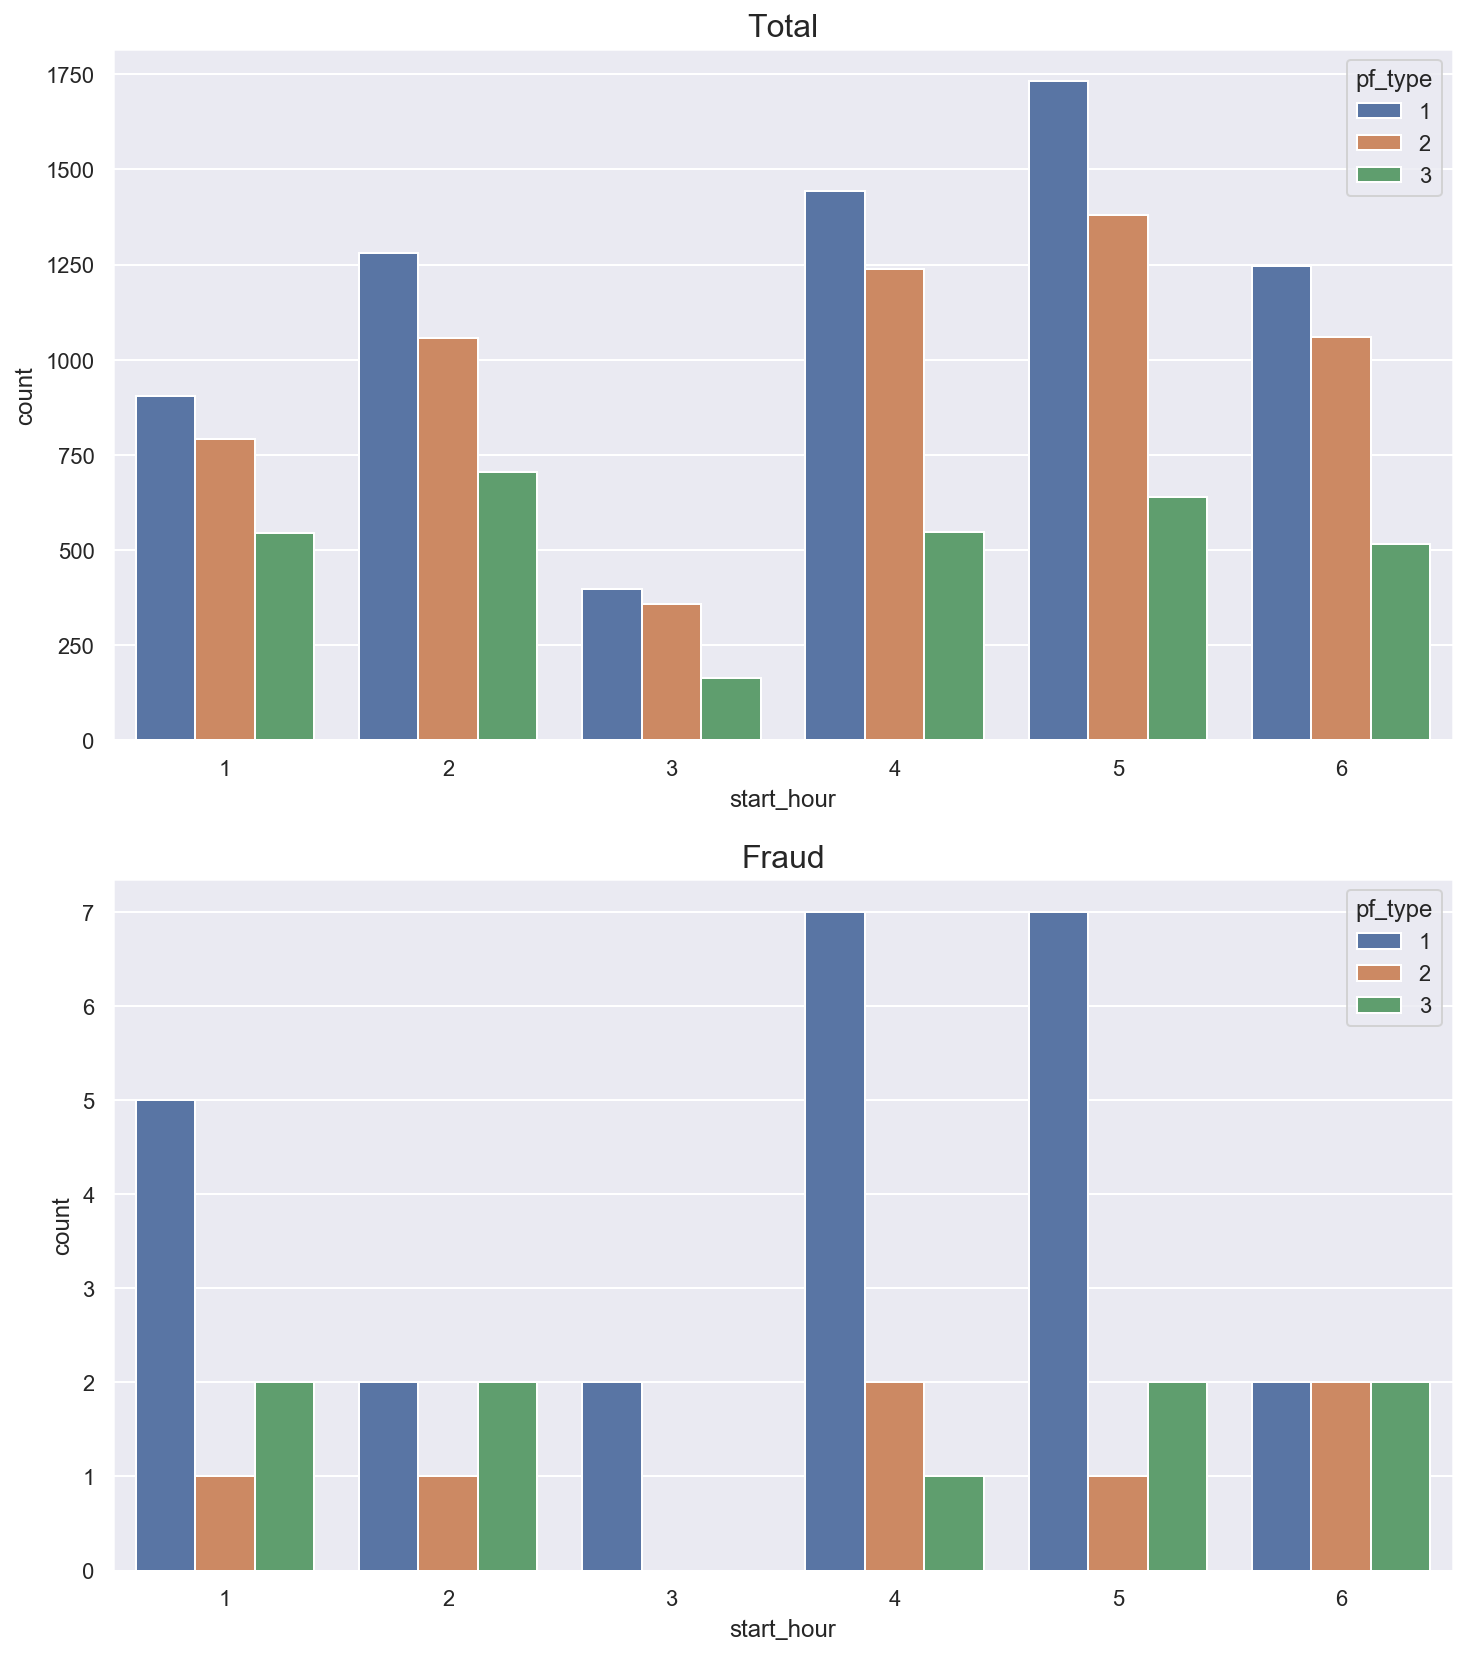

<Figure size 864x576 with 0 Axes>

In [43]:
# 나이와 보험 타입
fig, ax = plt.subplots(2, 1, figsize=(12, 14))
plt.figure(figsize=(12,8))
sns.countplot(x='start_hour',hue='pf_type' ,data=df, ax=ax[0])
ax[0].set_title('Total', fontsize=16)
sns.countplot(x='start_hour',hue='pf_type' ,data=df_fr_t, ax=ax[1]);
ax[1].set_title('Fraud', fontsize=16);

# 자기부담금이 낮은 타입을 선택하는 것은 다 같았다
# Fraud는 어린 나이에서의 10~15시간 대여 비율이 도드라져보임
# => 

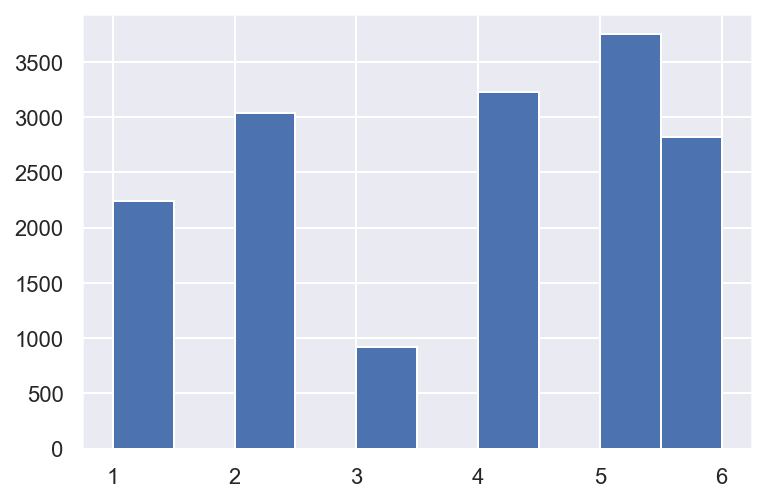

In [45]:
plt.hist(x='start_hour',data=df);

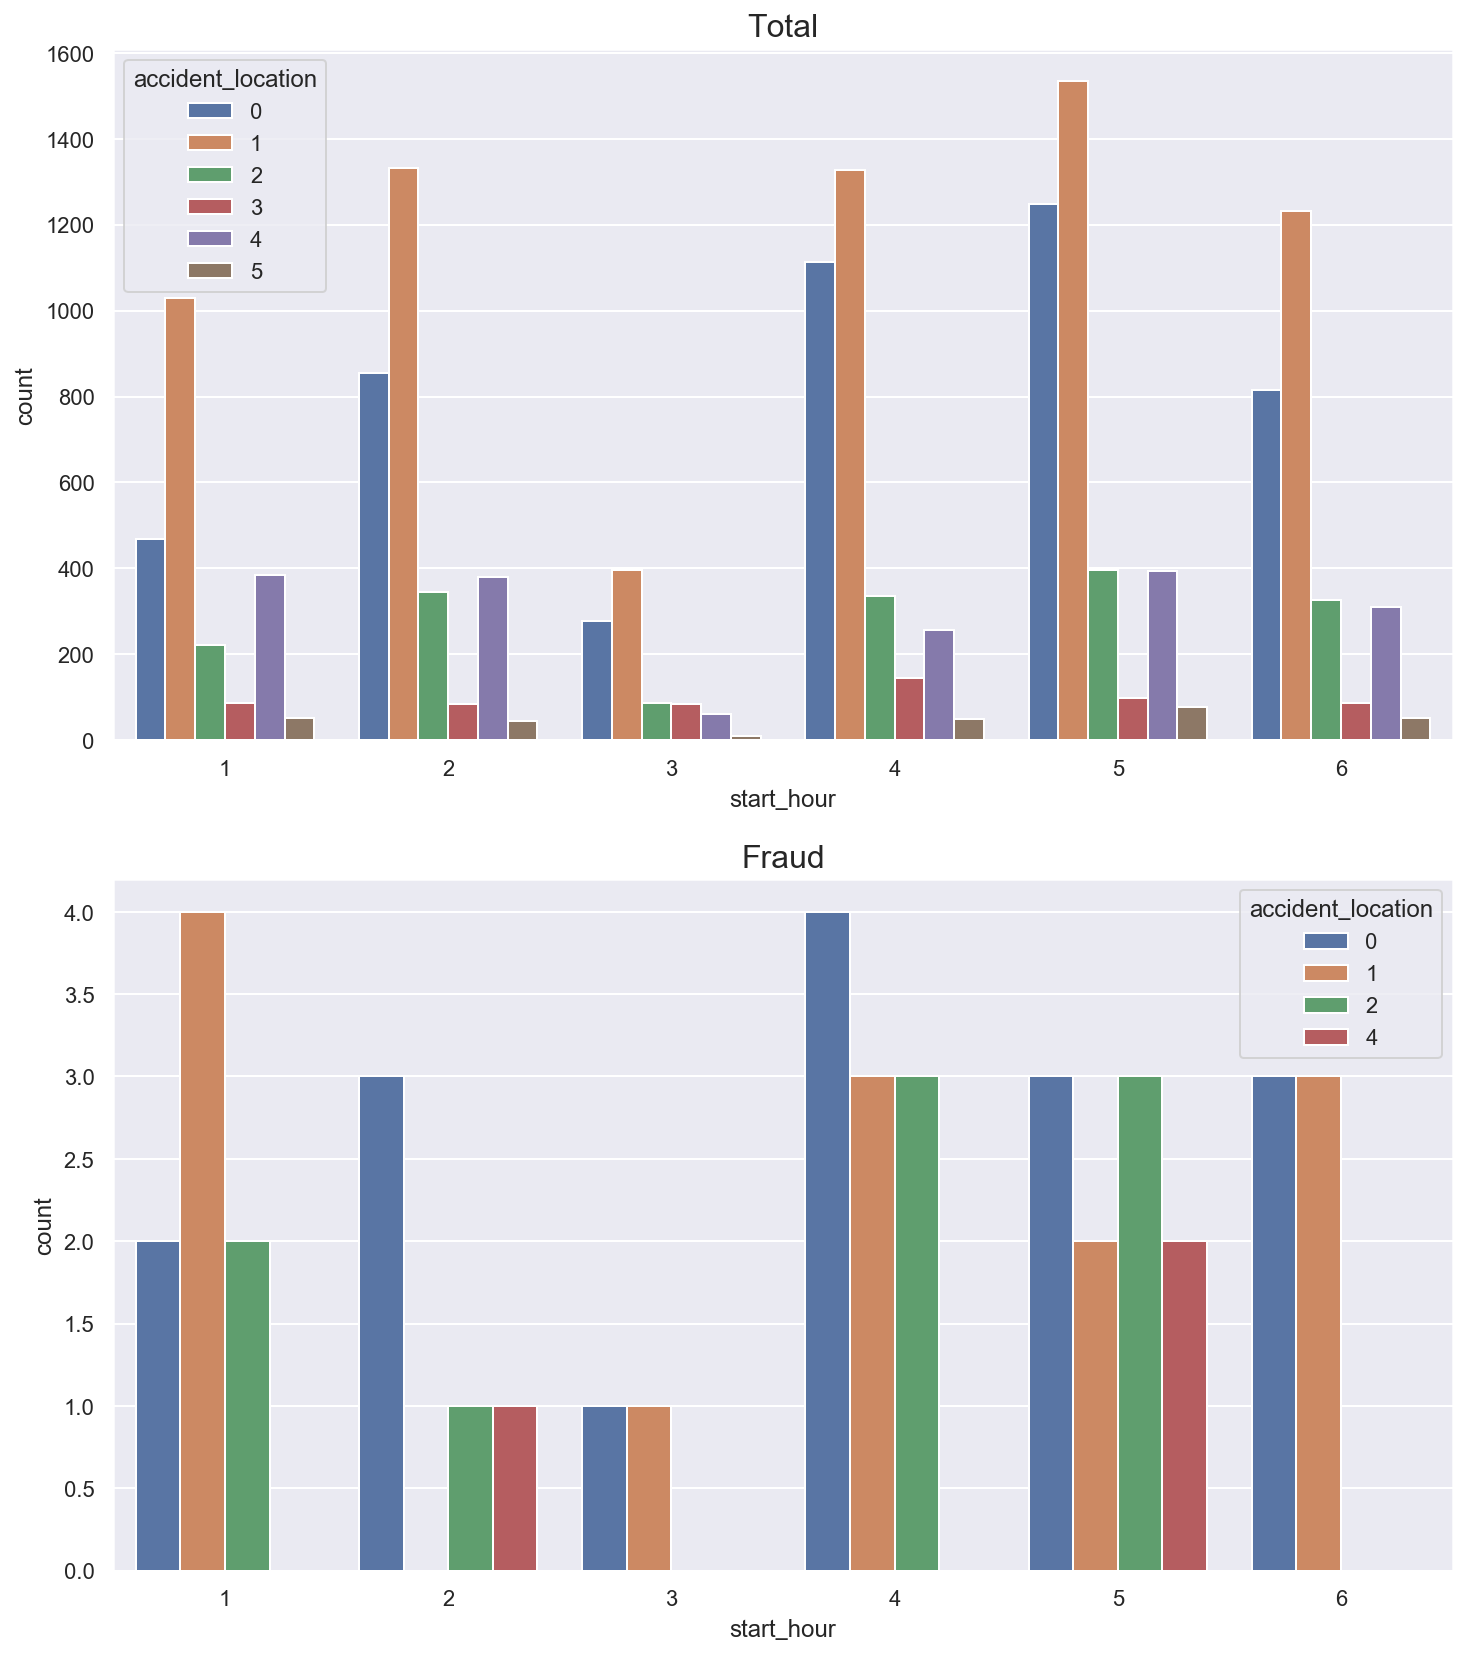

<Figure size 864x576 with 0 Axes>

In [132]:
fig, ax = plt.subplots(2, 1, figsize=(12, 14))
plt.figure(figsize=(12,8))
sns.countplot(x='start_hour',hue='accident_location' ,data=df, ax=ax[0])
ax[0].set_title('Total', fontsize=16)
sns.countplot(x='start_hour',hue='accident_location' ,data=df_fr_t, ax=ax[1]);
ax[1].set_title('Fraud', fontsize=16);

In [215]:
import matplotlib.ticker as mticker

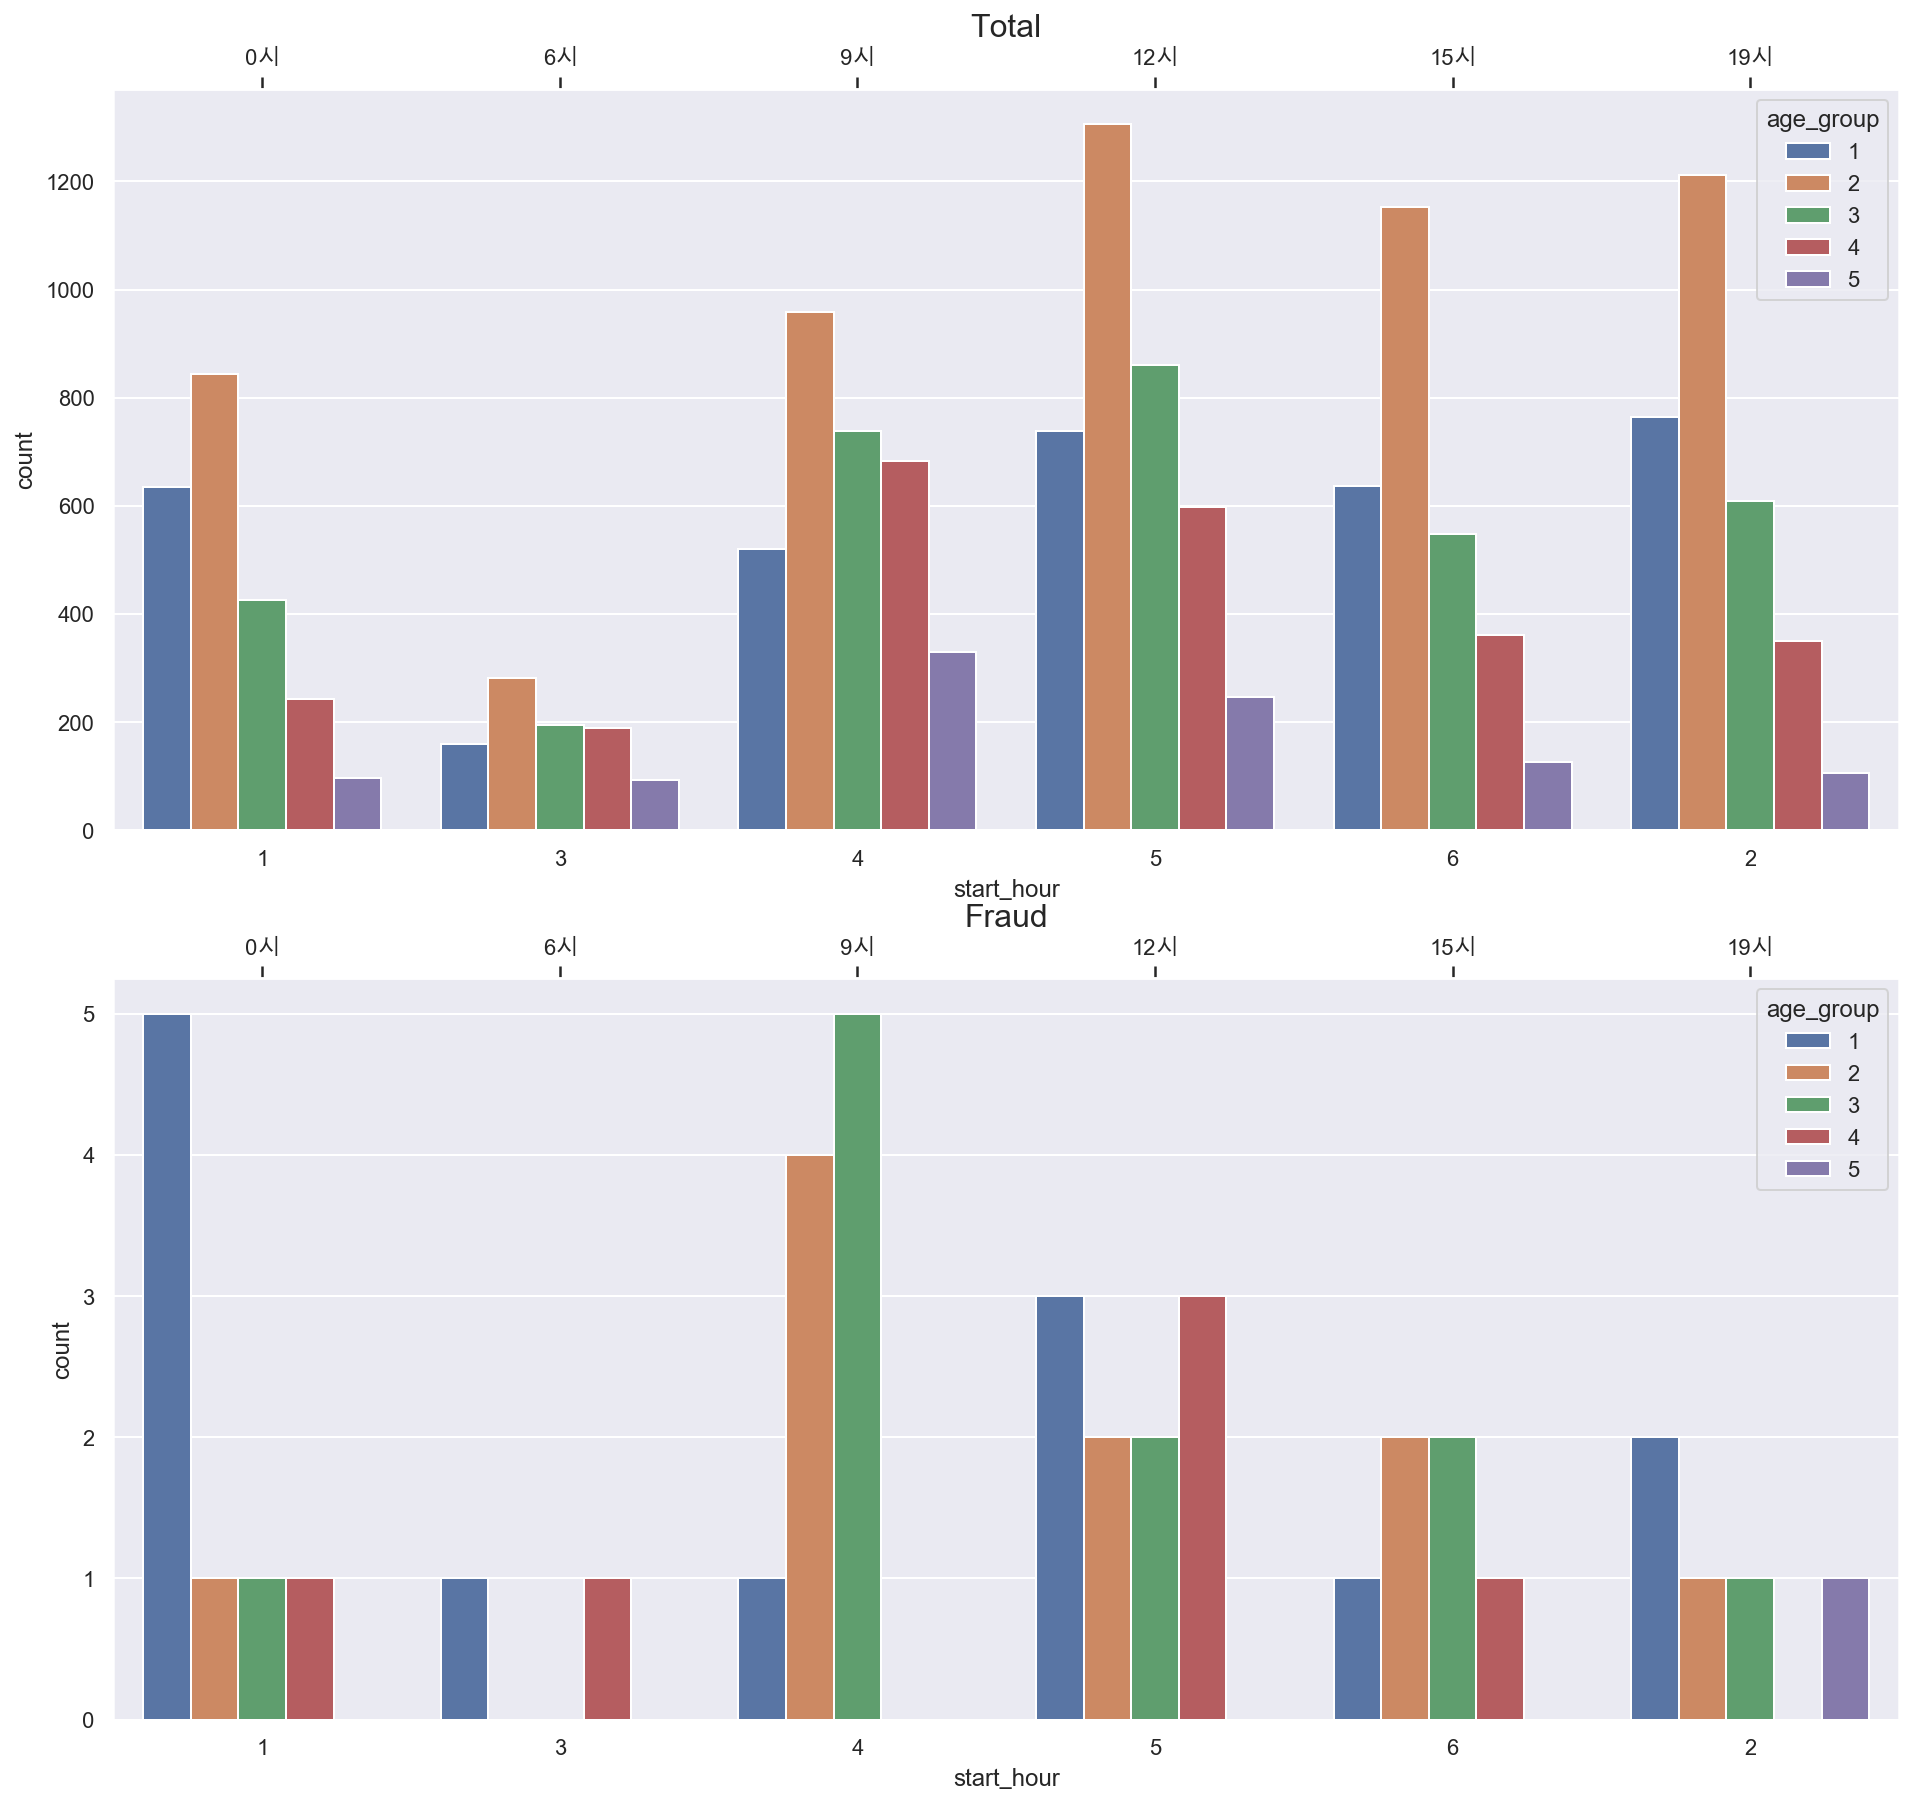

<Figure size 864x576 with 0 Axes>

In [244]:
fig, ax = plt.subplots(2, 1, figsize=(16, 15))
plt.figure(figsize=(12,8))

sns.countplot(x='start_hour',hue='age_group' ,data=df, ax=ax[0], order=[1,3,4,5,6,2])
ax[0].set_title('Total', fontsize=16)
ax_t = ax[0].secondary_xaxis('top')
ax_t.set_xticks(ticks=np.arange(7))
ax_t.set_xticklabels(labels = ['0시','6시','9시','12시','15시','19시','22시'])

sns.countplot(x='start_hour',hue='age_group' ,data=df_fr_t, ax=ax[1], order=[1,3,4,5,6,2])
ax[1].set_title('Fraud', fontsize=16);
ax_t = ax[1].secondary_xaxis('top')
ax_t.set_xticks(ticks=np.arange(7))
ax_t.set_xticklabels(labels = ['0시','6시','9시','12시','15시','19시','22시']);

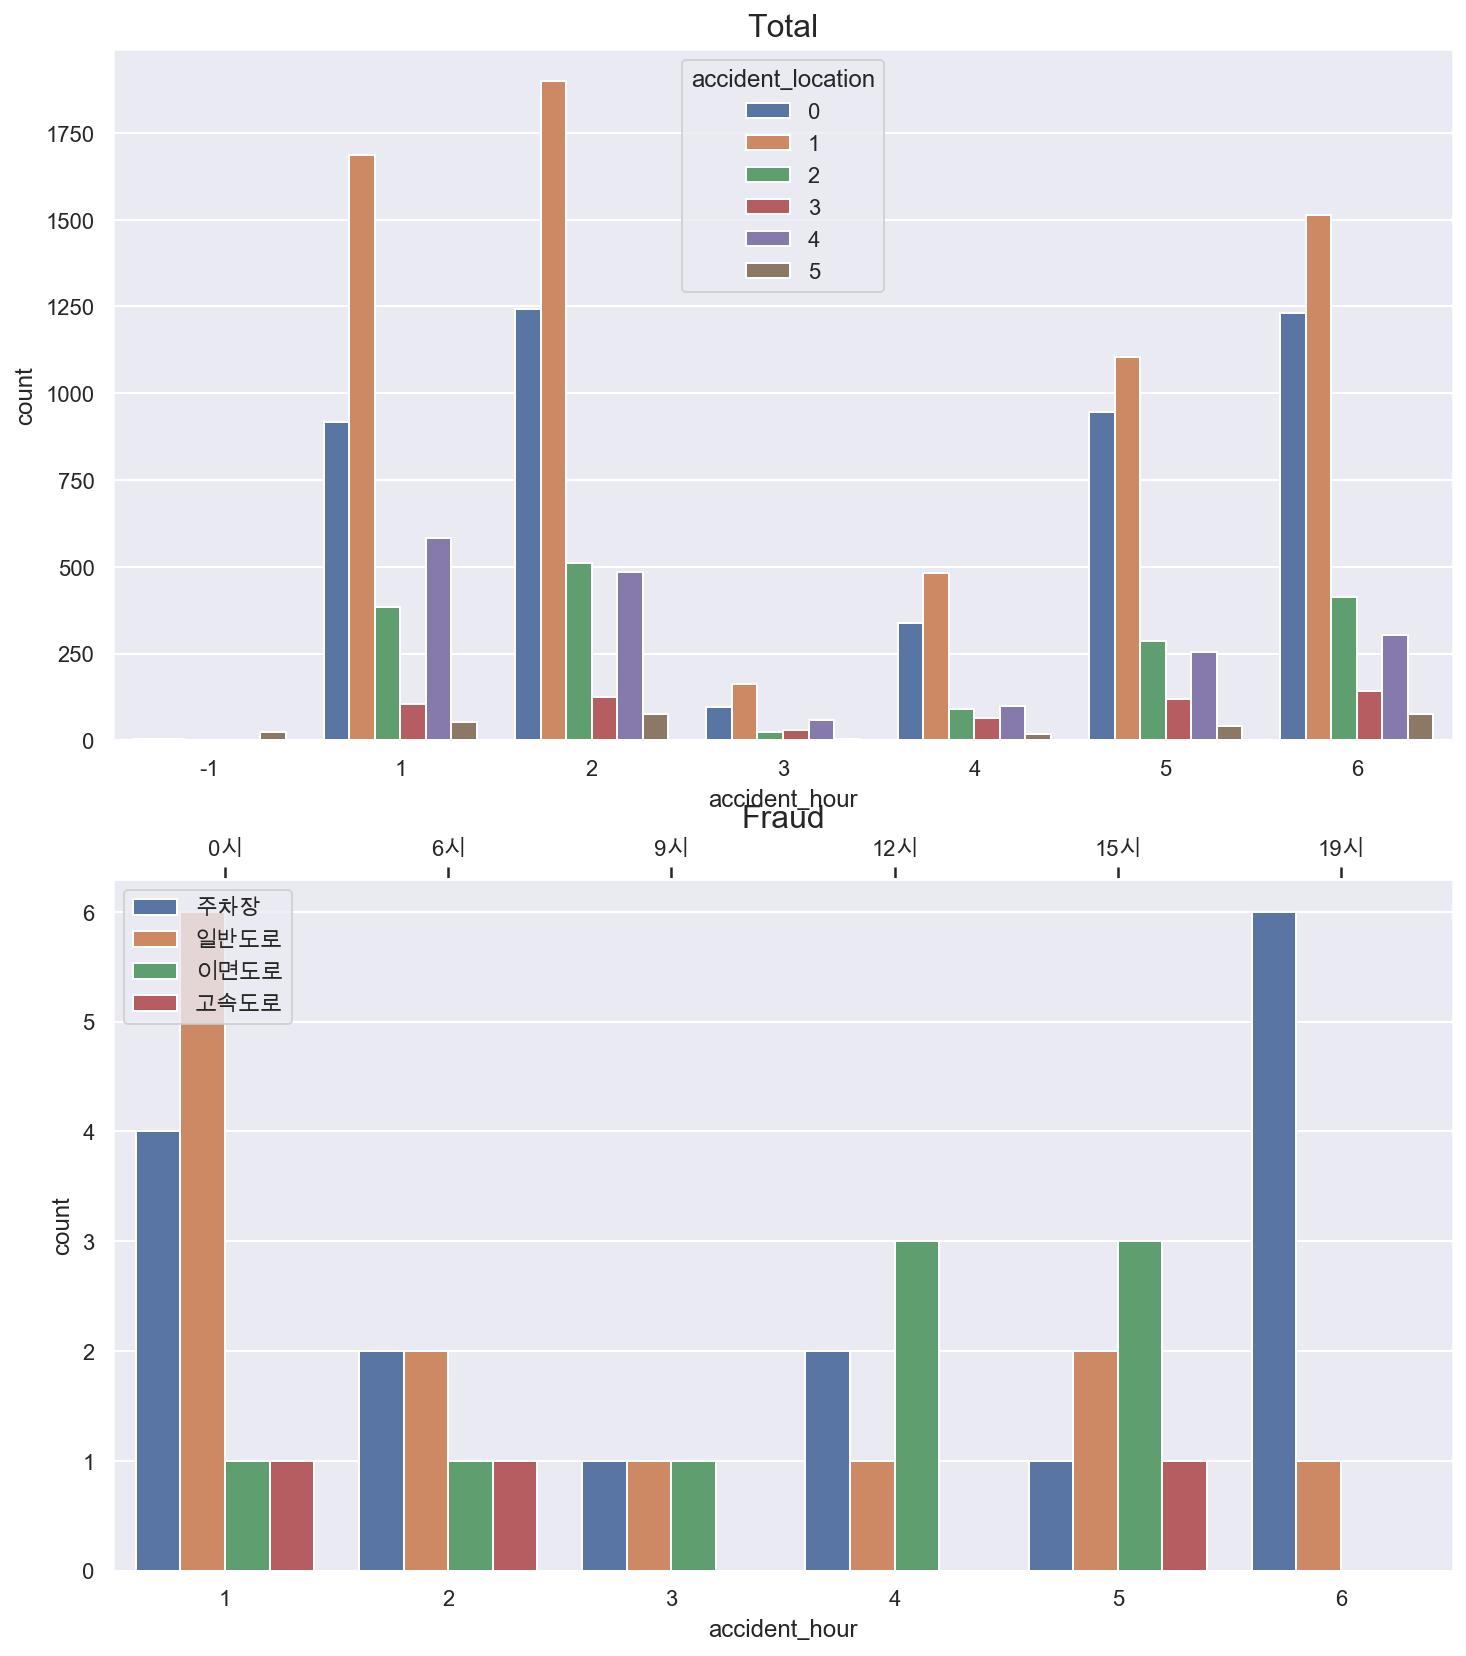

<Figure size 864x576 with 0 Axes>

In [281]:
fig, ax = plt.subplots(2, 1, figsize=(12, 14))
plt.figure(figsize=(12,8))
sns.countplot(x='accident_hour',hue='accident_location' ,data=df, ax=ax[0])
ax[0].set_title('Total', fontsize=16)

sns.countplot(x='accident_hour',hue='accident_location' ,data=df_fr_t, ax=ax[1]);
ax[1].set_title('Fraud', fontsize=16)
ax[1].legend(['주차장','일반도로', '이면도로', '고속도로'])
ax_t = ax[1].secondary_xaxis('top')
ax_t.set_xticks(ticks=np.arange(7))
ax_t.set_xticklabels(labels = ['0시','6시','9시','12시','15시','19시','22시']);


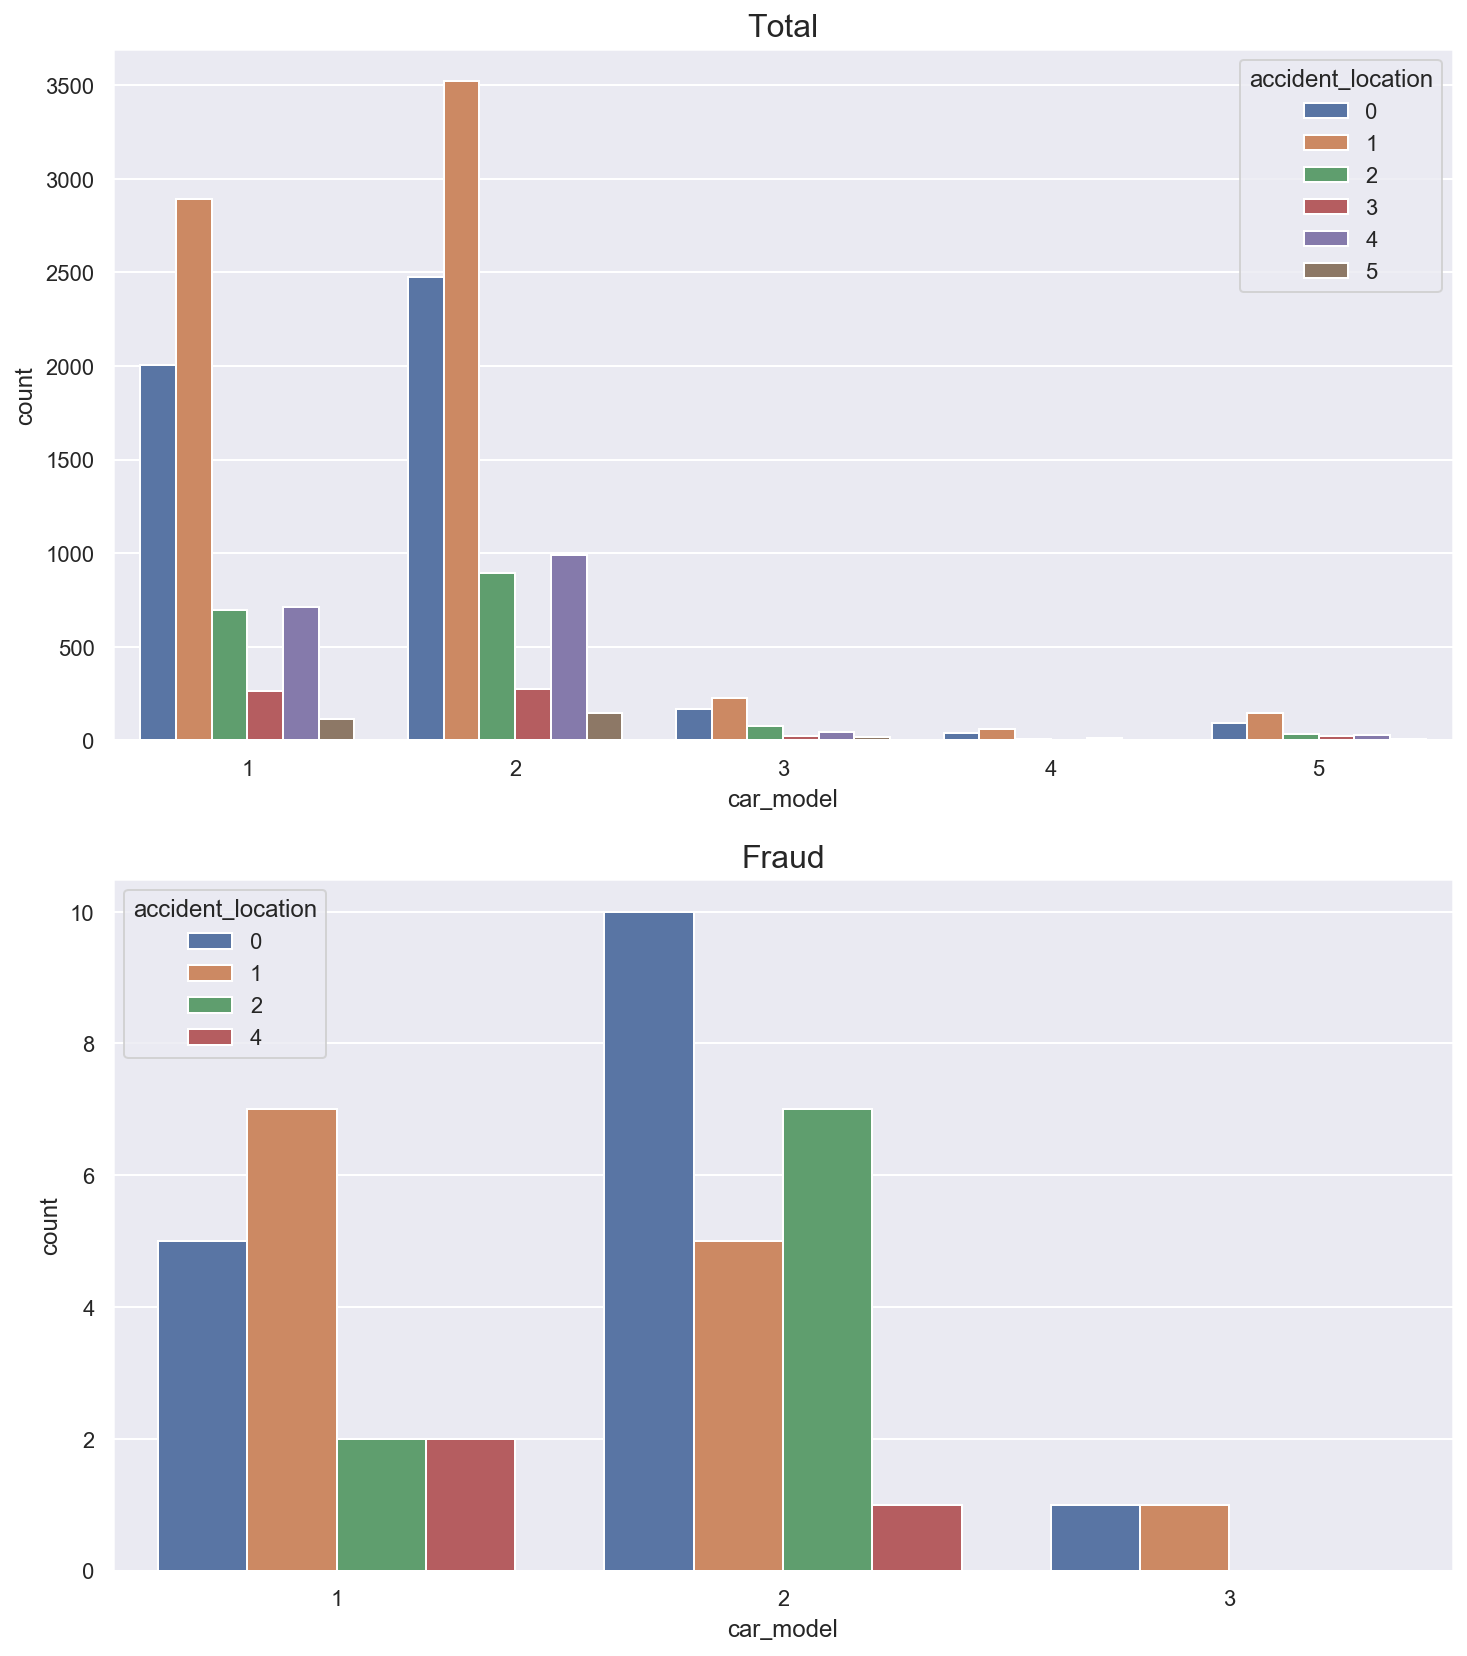

<Figure size 864x576 with 0 Axes>

In [137]:
#차종과 사고위치
fig, ax = plt.subplots(2, 1, figsize=(12, 14))
plt.figure(figsize=(12,8))
sns.countplot(x='car_model',hue='accident_location' ,data=df, ax=ax[0])
ax[0].set_title('Total', fontsize=16)
sns.countplot(x='car_model',hue='accident_location' ,data=df_fr_t, ax=ax[1]);
ax[1].set_title('Fraud', fontsize=16);

# 중형의 

In [48]:
df_tmp = df[['fraud_YN','age_group', 'pf_type','start_hour','duration','accident_hour']].copy()
df_tmp.head()

,fraud_YN,age_group,pf_type,start_hour,duration,accident_hour
0,0,3,2,4,2,4
1,0,4,3,1,4,4
2,0,4,3,1,4,6
3,0,3,2,3,3,5
4,0,1,1,1,1,1


## 6. 사고시간과 시작시간의 차이를 구하여 EDA

In [466]:
timels

[1, 3, 4, 5, 6, 2]

In [507]:
diffls = []

for idx in range(len(df_tmp_f)):
    sh = timels.index(df_tmp_f.iloc[idx]['start_hour']) +1
    ah = timels.index(df_tmp_f.iloc[idx]['accident_hour']) +1

    if sh > ah:
        diff = ah + 6 - sh
    else:
        diff = ah - sh

    diffls.append(diff)
    
df_tmp_f['diff'] = diffls

In [506]:
timels.index(df_tmp.iloc[0]['start_hour'])

2

In [508]:
df_tmp = df[df['accident_hour'] != -1.0][['start_hour','accident_hour','duration','fraud_YN']]

diffls = []

for idx in range(len(df_tmp)):
    sh = timels.index(df_tmp.iloc[idx]['start_hour'])
    ah = timels.index(df_tmp.iloc[idx]['accident_hour'])

    if sh > ah:
        diff = ah + 6 - sh
    else:
        diff = ah - sh

    diffls.append(diff)
    
df_tmp['diff'] = diffls
df_tmp.head()

,start_hour,accident_hour,duration,fraud_YN,diff
0,4,4,2,0,0
1,1,4,4,0,2
2,1,6,4,0,4
3,3,5,3,0,2
4,1,1,1,0,0


In [509]:
df_tmp_diff_f = df_tmp[df_tmp['fraud_YN'] == 0]
df_tmp_diff_t = df_tmp[df_tmp['fraud_YN'] == 1]

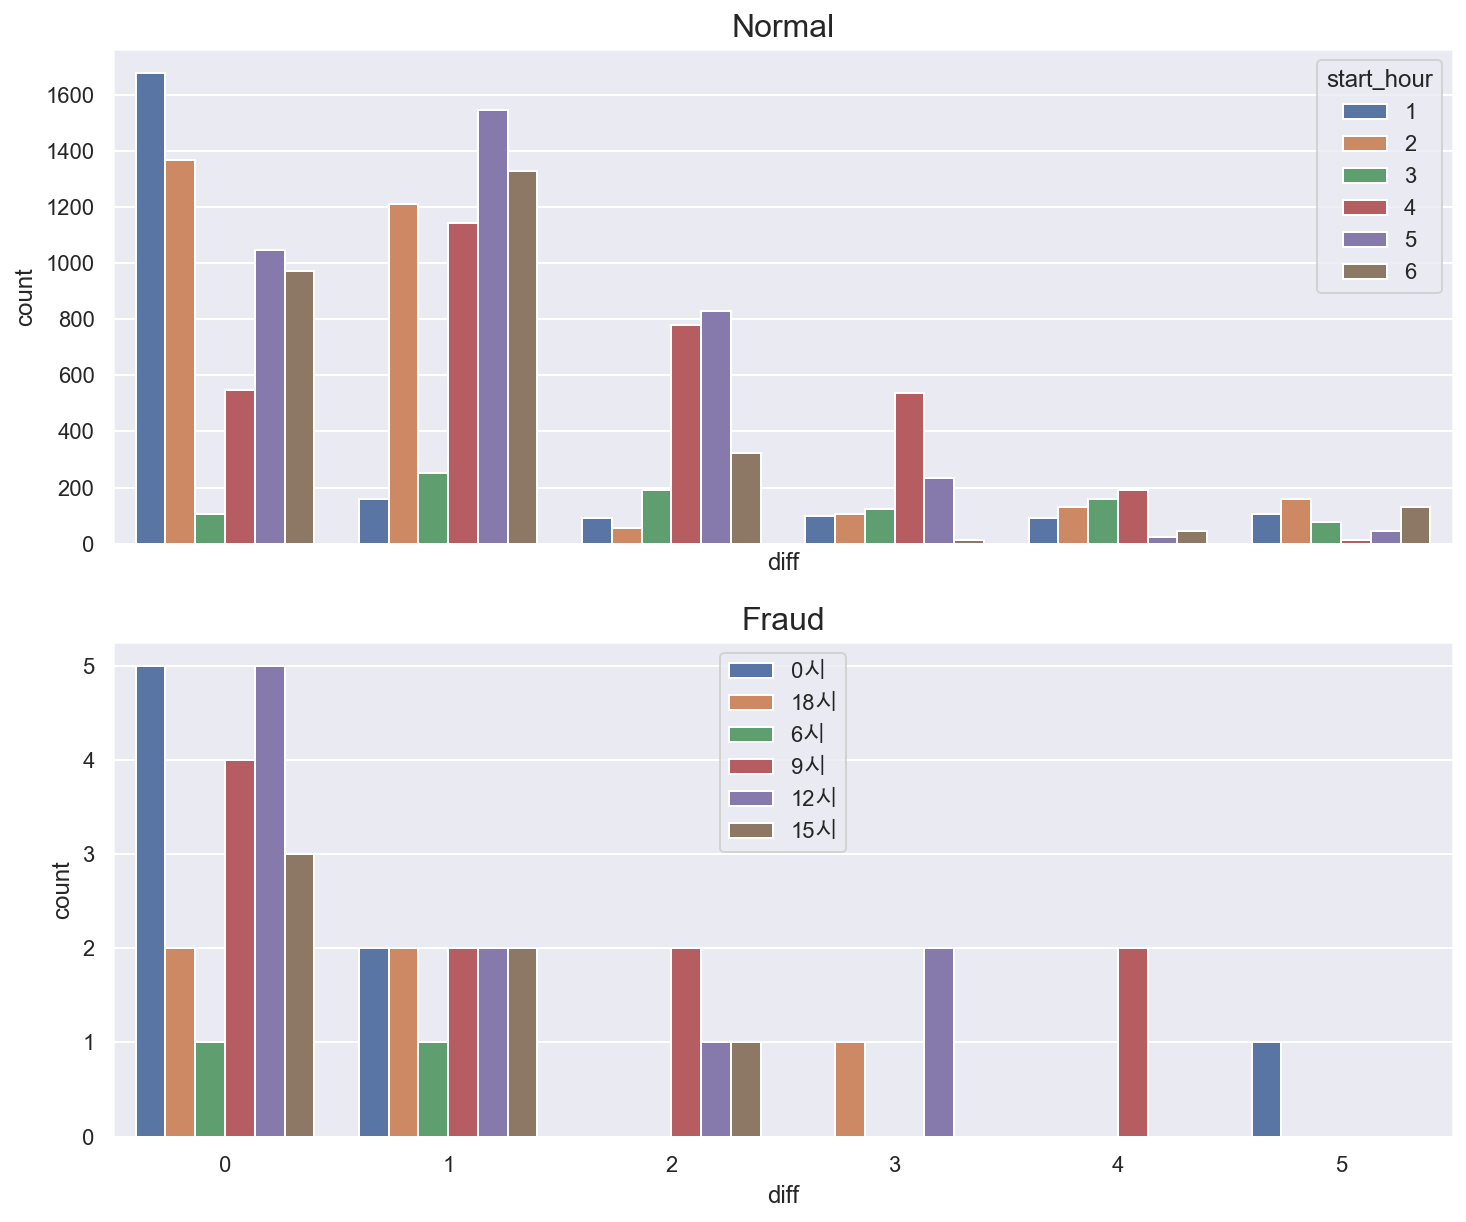

<Figure size 864x576 with 0 Axes>

In [510]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10))
plt.figure(figsize=(12,8))
sns.countplot(x='diff',hue='start_hour' ,data=df_tmp_diff_f, ax=ax[0])
ax[0].set_title('Normal', fontsize=16)
ax[0].set_xticks([])
# ax_t = ax[0].secondary_xaxis('top')
# ax_t.set_xticks(ticks=np.arange(7))
# ax_t.set_xticklabels(labels = ['0시','6시','9시','12시','15시','19시','22시'])

sns.countplot(x='diff',hue='start_hour' ,data=df_tmp_diff_t, ax=ax[1]);
ax[1].set_title('Fraud', fontsize=16)
ax[1].legend(['0시','18시', '6시', '9시', '12시','15시']);
# ax[1].set_xticks([])


In [503]:
df_tmp_diff_f12 = df_tmp_diff_f[df_tmp_diff_f['duration'].isin([1,2])]
df_tmp_diff_t12 = df_tmp_diff_t[df_tmp_diff_t['duration'].isin([1,2])]

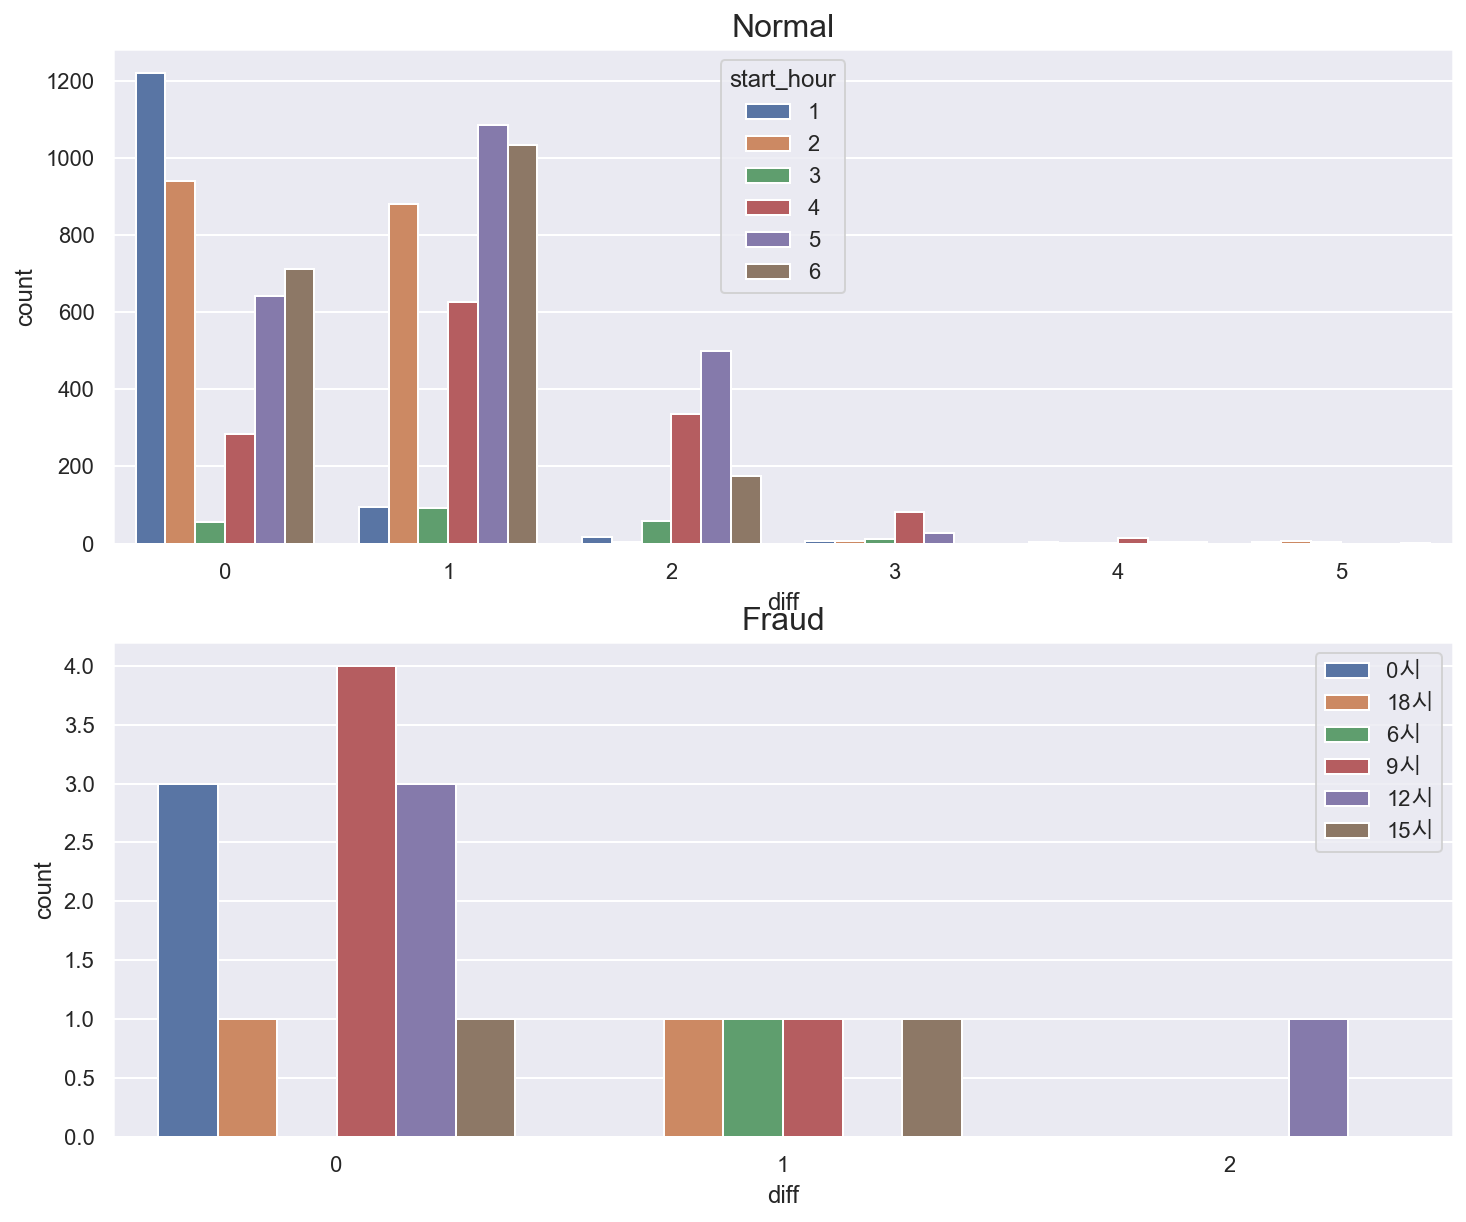

<Figure size 864x576 with 0 Axes>

In [511]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10))
plt.figure(figsize=(12,8))
sns.countplot(x='diff',hue='start_hour' ,data=df_tmp_diff_f12, ax=ax[0])
ax[0].set_title('Normal', fontsize=16)

sns.countplot(x='diff',hue='start_hour' ,data=df_tmp_diff_t12, ax=ax[1]);
ax[1].set_title('Fraud', fontsize=16)
ax[1].legend(['0시','18시', '6시', '9시', '12시','15시']);

<AxesSubplot:xlabel='diff', ylabel='count'>

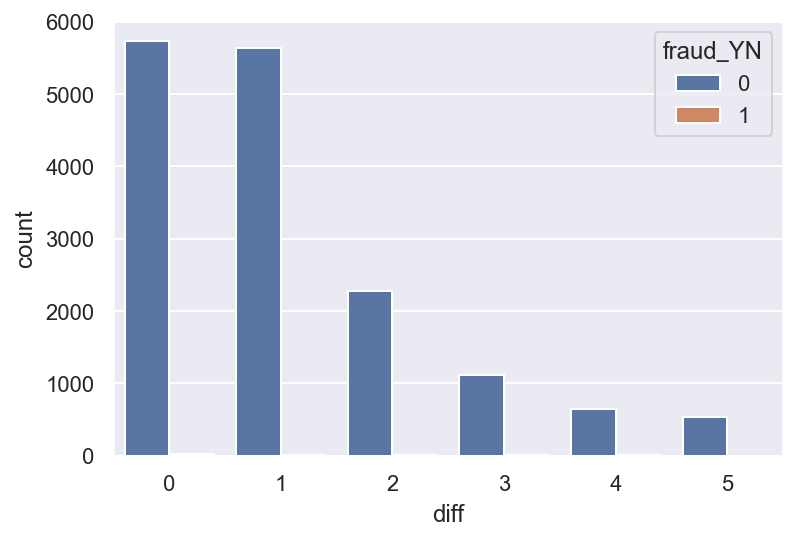

In [488]:
sns.countplot(x='diff', hue='fraud_YN', data=df_tmp)

## 순서 1,3,4,5,6,2

In [521]:
df_tmp_5 = df_tmp[df_tmp['diff'].isin([5])]
df_tmp_5 = df_tmp_5[df_tmp_5['fraud_YN'] == 0]
len(df_tmp_5)

533

In [522]:
df_tmp_5 = df_tmp[df_tmp['diff'].isin([5])]
df_tmp_5 = df_tmp_5[df_tmp_5['fraud_YN'] == 1]
len(df_tmp_5)

1

In [523]:
df_tmp_5 = df_tmp[df_tmp['diff'].isin([5])]
df_tmp_5 = df_tmp_5[df_tmp_5['fraud_YN'] == 0]
df_tmp_5 = df_tmp_5.reset_index(drop=True)
for idx in range(len(df_tmp_5)):
    if timels.index(df_tmp_5.iloc[idx]['start_hour']) >= timels.index(df_tmp_5.iloc[idx]['accident_hour']):
        df_tmp_5.drop(labels=idx)
len(df_tmp_5)        
# df_tmp_5[timels.index(df_tmp_5.iloc[idx]['start_hour']) < timels.index(df_tmp_5.iloc[idx]['accident_hour'])]

533

In [461]:
df_tmp[df_tmp['duration'].isin([1,2])]

,fraud_YN,age_group,pf_type,start_hour,duration,accident_hour,diff
18,1,1,1,1,2,1,0
83,1,2,1,6,2,2,1
100,1,2,1,4,2,4,0
143,1,1,2,2,1,1,1
163,1,4,3,5,2,5,0
230,1,3,2,4,1,4,0
364,1,3,1,4,1,5,1
383,1,2,1,2,2,2,0
417,1,3,3,6,1,6,0
436,1,3,2,4,1,4,0


In [469]:
df_tmp_f[df_tmp_f['duration'].isin([1,2])]['diff_t'] = df_tmp_f['accident_hour']
df_tmp_f[df_tmp_f['duration'].isin([1,2])]

<ipython-input-469-694ac0a81b33>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp_f[df_tmp_f['duration'].isin([1,2])]['diff_t'] = df_tmp_f['accident_hour']


,fraud_YN,age_group,pf_type,start_hour,duration,accident_hour,diff
18,1,1,1,1,2,1,0
83,1,2,1,6,2,2,1
100,1,2,1,4,2,4,0
143,1,1,2,2,1,1,1
163,1,4,3,5,2,5,0
230,1,3,2,4,1,4,0
364,1,3,1,4,1,5,1
383,1,2,1,2,2,2,0
417,1,3,3,6,1,6,0
436,1,3,2,4,1,4,0


In [465]:
df_tmp_f[df_tmp_f['duration'].isin([3,4])]

,fraud_YN,age_group,pf_type,start_hour,duration,accident_hour,diff
6,1,3,3,6,3,1,2
45,1,1,1,5,4,6,1
60,1,3,3,2,4,1,1
119,1,5,3,2,3,2,0
182,1,3,1,5,3,1,3
199,1,3,1,4,3,1,4
214,1,2,1,4,3,6,2
247,1,2,1,5,4,6,1
263,1,1,1,2,3,4,3
282,1,2,1,4,3,6,2


In [464]:
df_tmp_f[df_tmp_f['duration'].isin([5])]

,fraud_YN,age_group,pf_type,start_hour,duration,accident_hour,diff


In [126]:
df_tmp_f.iloc[0]['diff'] = 4
df_tmp_f.head()

<ipython-input-126-97814f36c390>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp_f.iloc[0]['diff'] = 4


,fraud_YN,age_group,pf_type,start_hour,duration,accident_hour,diff
6,1,3,3,6,3,1,3
18,1,1,1,1,2,1,3
45,1,1,1,5,4,6,3
60,1,3,3,2,4,1,3
83,1,2,1,6,2,2,3


In [125]:
# df_tmp_f['diff'] = 3
df_tmp_f.head()

,fraud_YN,age_group,pf_type,start_hour,duration,accident_hour,diff
6,1,3,3,6,3,1,3
18,1,1,1,1,2,1,3
45,1,1,1,5,4,6,3
60,1,3,3,2,4,1,3
83,1,2,1,6,2,2,3


In [ ]:
df_tmp['diff_hour'] = 